# Imports

In [406]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%run methods_freshfrozen.ipynb

In [295]:
df_small = pd.read_csv("evidence_freshfrozen_small.txt",  sep="\t")

C:\Users\cocob\AppData\Local\Temp\ipykernel_30184\1599270291.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_small = pd.read_csv("evidence_freshfrozen_small.txt",  sep="\t")


# Dataset Infos
Number of columns:          71 <br>
Number of samples:          1000 <br>
Number of proteins:         1064 <br>
Number of genes:            1061 <br>
Number of fractions:        48 <br>
Number of Raw files:        144 (1 per fraction) <br>
experiment count:           3 <br>
sequence length range:      8 - 48 <br>
m/Z range:                  466.737 - 1531.403 <br>
Mass range:                 931.461 - 4591.188 <br>
RT range:                   1.396 - 28.239(30  min usual) <br>
1/K range:                  0.854 - 1.290 <br>
CCS range:                  346.289 - 1007.157 <br>
<br>
Modifications:             
 <br> 'Unmodified' <br>
                            'Acetyl (Protein N-term)' <br>
                            'Oxidation (M)'<br>
                            'Acetyl (Protein N-term),Oxidation (M)' <br>
                            '2 Oxidation (M)'<br> 
<br>

columns: ['Sequence', 'Length', 'Modifications', 'Modified sequence','Oxidation (M) Probabilities', 'Oxidation (M) Score Diffs',<br>
       'Acetyl (Protein N-term)', 'Oxidation (M)', 'Missed cleavages','Proteins', 'Leading proteins', 'Leading razor protein', 'Gene names',<br>
       'Protein names', 'Type', 'Raw file', 'Fraction', 'Experiment','MS/MS m/z', 'Charge', 'm/z', 'Mass','Uncalibrated - Calibrated m/z [ppm]',<br>
       'Uncalibrated - Calibrated m/z [Da]', 'Mass error [ppm]','Mass error [Da]', 'Uncalibrated mass error [ppm]',<br>
       'Uncalibrated mass error [Da]', 'Max intensity m/z 0', 'Retention time','Retention length', 'Calibrated retention time',<br>
       'Calibrated retention time start', 'Calibrated retention time finish','Retention time calibration', 'Ion mobility index',<br>
       'Ion mobility length', '1/K0', '1/K0 length', 'Calibrated 1/K0', 'CCS','Calibrated CCS', 'CCS length', 'Match time difference',<br>
       'Match m/z difference', 'Match K0 difference', 'Match q-value','Match score', 'Number of data points', 'Number of scans',<br>
       'Number of isotopic peaks', 'PIF', 'Fraction of total spectrum','Base peak fraction', 'PEP', 'MS/MS count', 'MS/MS scan number',<br>
       'Score', 'Delta score', 'Combinatorics', 'Intensity', 'Reverse','Potential contaminant', 'id', 'Protein group IDs', 'Peptide ID',<br>
       'Mod. peptide ID', 'MS/MS IDs', 'Best MS/MS', 'Oxidation (M) site IDs','Taxonomy IDs']<br>

# Data Exploration

In [242]:
# subset dataset
df_51 = df_small[df_small["Experiment"]=='P064051']
df_64 = df_small[df_small["Experiment"]=='P064064']
df_28 = df_small[df_small["Experiment"]=='P064428']

#### Mass vs 1/K0

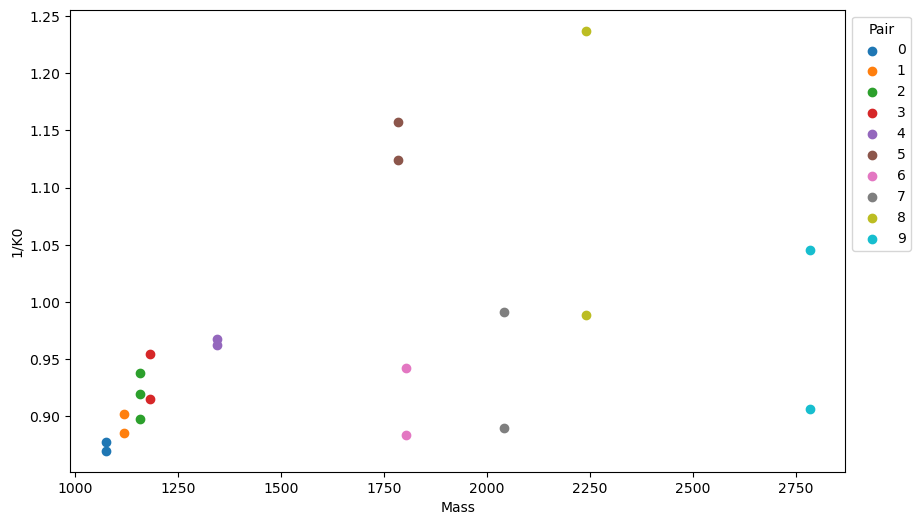

In [243]:
isomers_df = find_isomers(df_small, 'Mass', 0.0)
plot_scatter(isomers_df, x='Mass', y = '1/K0', c= 'Pair')

### Modification

look at Mofifications, and see where are the differences(mass, RT, IM)

c:\Users\cocob\miniconda3\envs\p_a\lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Mass', ylabel='Modifications'>

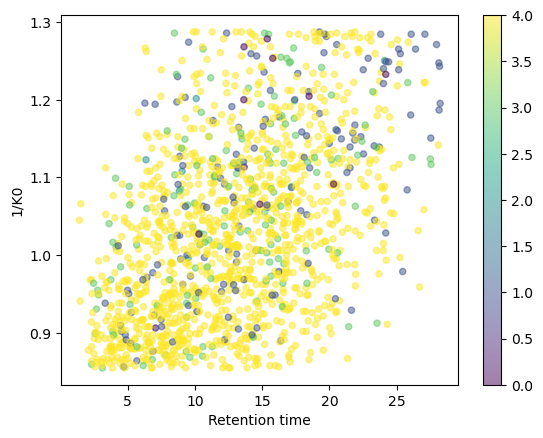

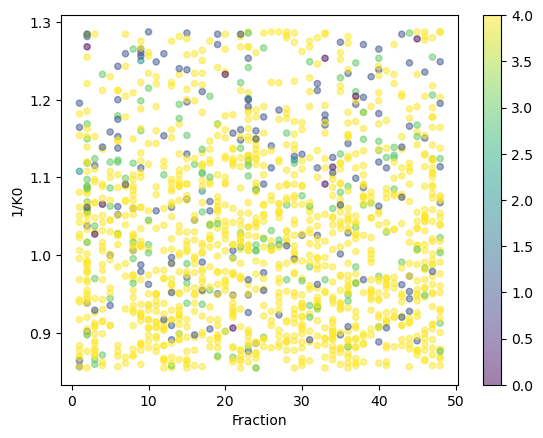

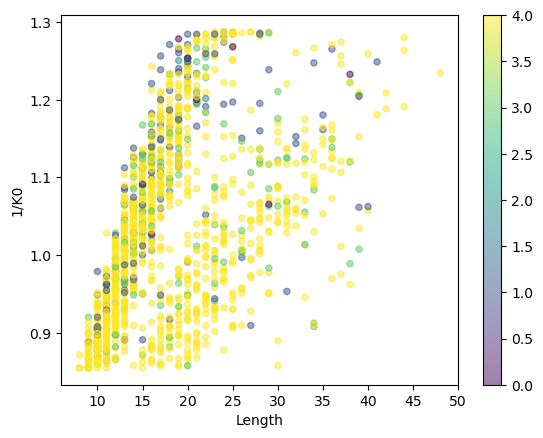

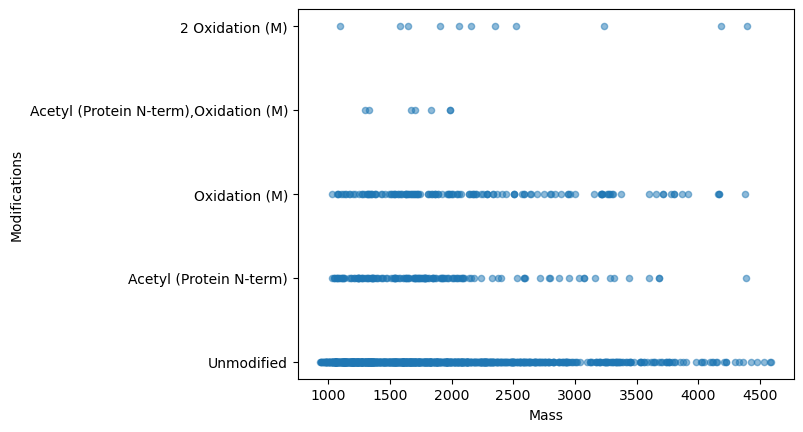

In [463]:
df_mod = df_small.drop_duplicates(subset =  ['Sequence', 'Modified sequence', 'Modifications'])
df_mod = df_mod[df_mod['Modified sequence'].notna()]
df_mod.plot.scatter(x = 'Retention time', y = '1/K0', c = pd.Categorical(df_mod['Modifications']).codes, colormap = 'viridis', alpha = 0.5)
df_mod.plot.scatter(x = 'Fraction', y = '1/K0', c = pd.Categorical(df_mod['Modifications']).codes, colormap = 'viridis', alpha = 0.5)
df_mod.plot.scatter(x = 'Length', y = '1/K0', c = pd.Categorical(df_mod['Modifications']).codes, colormap = 'viridis', alpha = 0.5)
df_mod.plot.scatter(x = 'Mass', y = 'Modifications',colormap = 'viridis', alpha = 0.5)


Modifications: 'Unmodified', 'Acetyl (Protein N-term)', 'Oxidation (M)', 'Acetyl (Protein N-term),Oxidation (M)', '2 Oxidation (M)'<br> 
Modification|Number Sequences|number of only modified sequences(no matching unmodified sequence available)
unmodified: 8217, 0 
acelyrated: 723, 681 
oxilated: 955, 2 
ac and ox: 40, 37 
double ox: 65, 0 
find out how much the modifications influence Mass, RT, IM<br> 
<br> 
Mass Difference: <br> 
    Unmodified: 0.0<br> 
    Oxidation : 15.99<br> 
    Acetylation: 42.01<br> 
    Acetylation-Oxidation: 58.00<br> 
    2-Oxidation: 31.98<br> 
<br> 
RT Difference: <br> 
    Unmodified: -10 - 10 , mean = 0 ( moderate clustering with 1/K0 length)<br> 
    Oxidation : -4-2 (no cluster with Mass, Charge, Fraction, Experiment)(moderate clustering with 1/K0)<br> 
    Acetylation: -8, 1, 4<br> 
    Acetylation-Oxidation: 1.3, 1.5, 1.9
    2-Oxidation: -4.5 - -2.5 ( moderate cluster with Charge)<br> 
(Charge also little influence, visible the more charge, the less variance -> probably only less values in the higher charge states)<br> 
<br> 
1/K0 Differences:<br> 
    Unmodified: -0.4 - 0.4, mean = 0 (correlation with 1/K0)<br> 
    Oxidation : -0.3 - 0.3, mean = 0 -''-<br> 
    Acetylation: 0.0 - 0.2<br> 
    Acetylation-Oxidation: 0.01, 0.037, 0.05<br> 
    2-Oxidation: -0.05 - 0.2<br> 

Observations: 
    - only 3 measured acetylation-oxidation-> no statistical testing possible


In [464]:
%run methods_freshfrozen.ipynb
df_un = difference_mass_modifications(df_small, 'Unmodified', '1/K0')
df_ac = difference_mass_modifications(df_small, 'Acetyl (Protein N-term)', '1/K0')
df_ox = difference_mass_modifications(df_small, 'Oxidation (M)', '1/K0')
df_ac_ox = difference_mass_modifications(df_small, 'Acetyl (Protein N-term),Oxidation (M)', '1/K0')
df_ox2 = difference_mass_modifications(df_small, '2 Oxidation (M)', '1/K0')


Modification|Number Sequences|number of only modified sequences


TypeError: object of type 'int' has no len()

In [466]:
print(f'Modification|Number Sequences|number of only modified sequences')
print(f'unmodified: {len(df_un[0])}, {df_un[1]} ')
print(f'acelyrated: {len(df_ac[0])}, {df_ac[1]} ')
print(f'oxilated: {len(df_ox[0])}, {df_ox[1]} ')
print(f'ac and ox: {len(df_ac_ox[0])}, {df_ac_ox[1]} ')
print(f'double ox: {len(df_ox2[0])}, {df_ox2[1]} ')



Modification|Number Sequences|number of only modified sequences
unmodified: 8217, 0 
acelyrated: 723, 681 
oxilated: 955, 2 
ac and ox: 40, 37 
double ox: 65, 0 


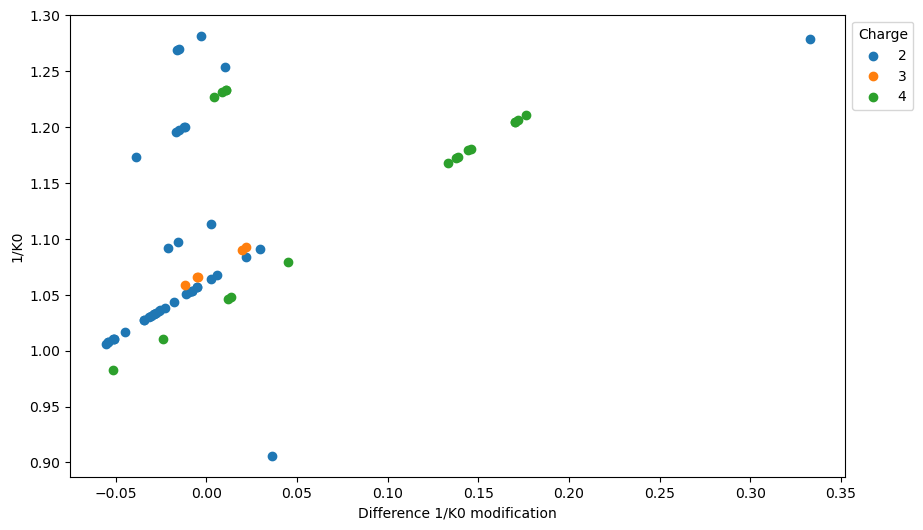

In [461]:
plot_scatter(df_ox2[0], 'Difference 1/K0 modification', '1/K0', c = 'Charge')


## Isomers

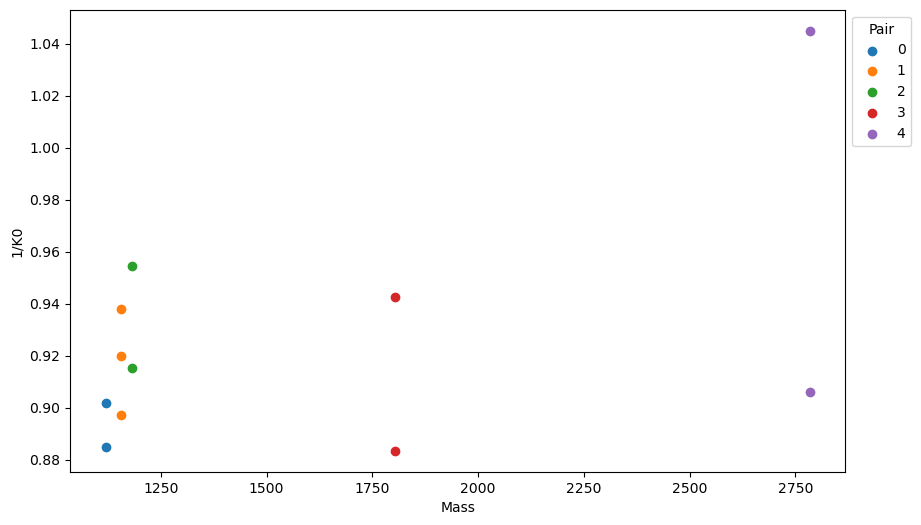

In [244]:
isomers_df = find_isomers(df_51, 'Mass', 0.0)
plot_scatter(df = isomers_df, x='Mass', y= '1/K0', c='Pair')

#### m/z vs 1/K0

# Matrix Effect

## Peptides in many fractions

In [286]:
top_5_seqs = ['AAAIGIDLGTTYSCVGVFQHGK', 'AADFQLHTHVNDGTEFGGSIYQK', 'AAEAAAAPAESAAPAAGEEPSKEEGEPK', 'AAHVFFTDSCPDALFNELVK', 'AALDGTPGMIGYGMAK']

### Experiment 51

In [247]:
# look at proteins
# over different fractions
df_proteins_51 = df_51.sort_values(by='Proteins', ignore_index=True)
df_proteins_51 = df_proteins_51.drop_duplicates(subset=['Sequence', 'Fraction', 'Experiment', 'Proteins'], ignore_index=True)
df_proteins_51 = df_proteins_51[['Sequence', 'Fraction', 'Experiment', 'Proteins']]

# make new table with unique sequence, in how many fractions and how many experiments
df_unique_seq_51 = df_proteins_51[['Sequence', 'Fraction', 'Experiment']]

df_unique_seq_51 = df_unique_seq_51.groupby('Sequence').agg({'Experiment': 'nunique', 'Fraction': 'nunique'}).reset_index()

# Rename the columns for clarity
df_unique_seq_51.columns = ['Sequence', 'num_experiments', 'num_fractions']


<Axes: xlabel='Sequence'>

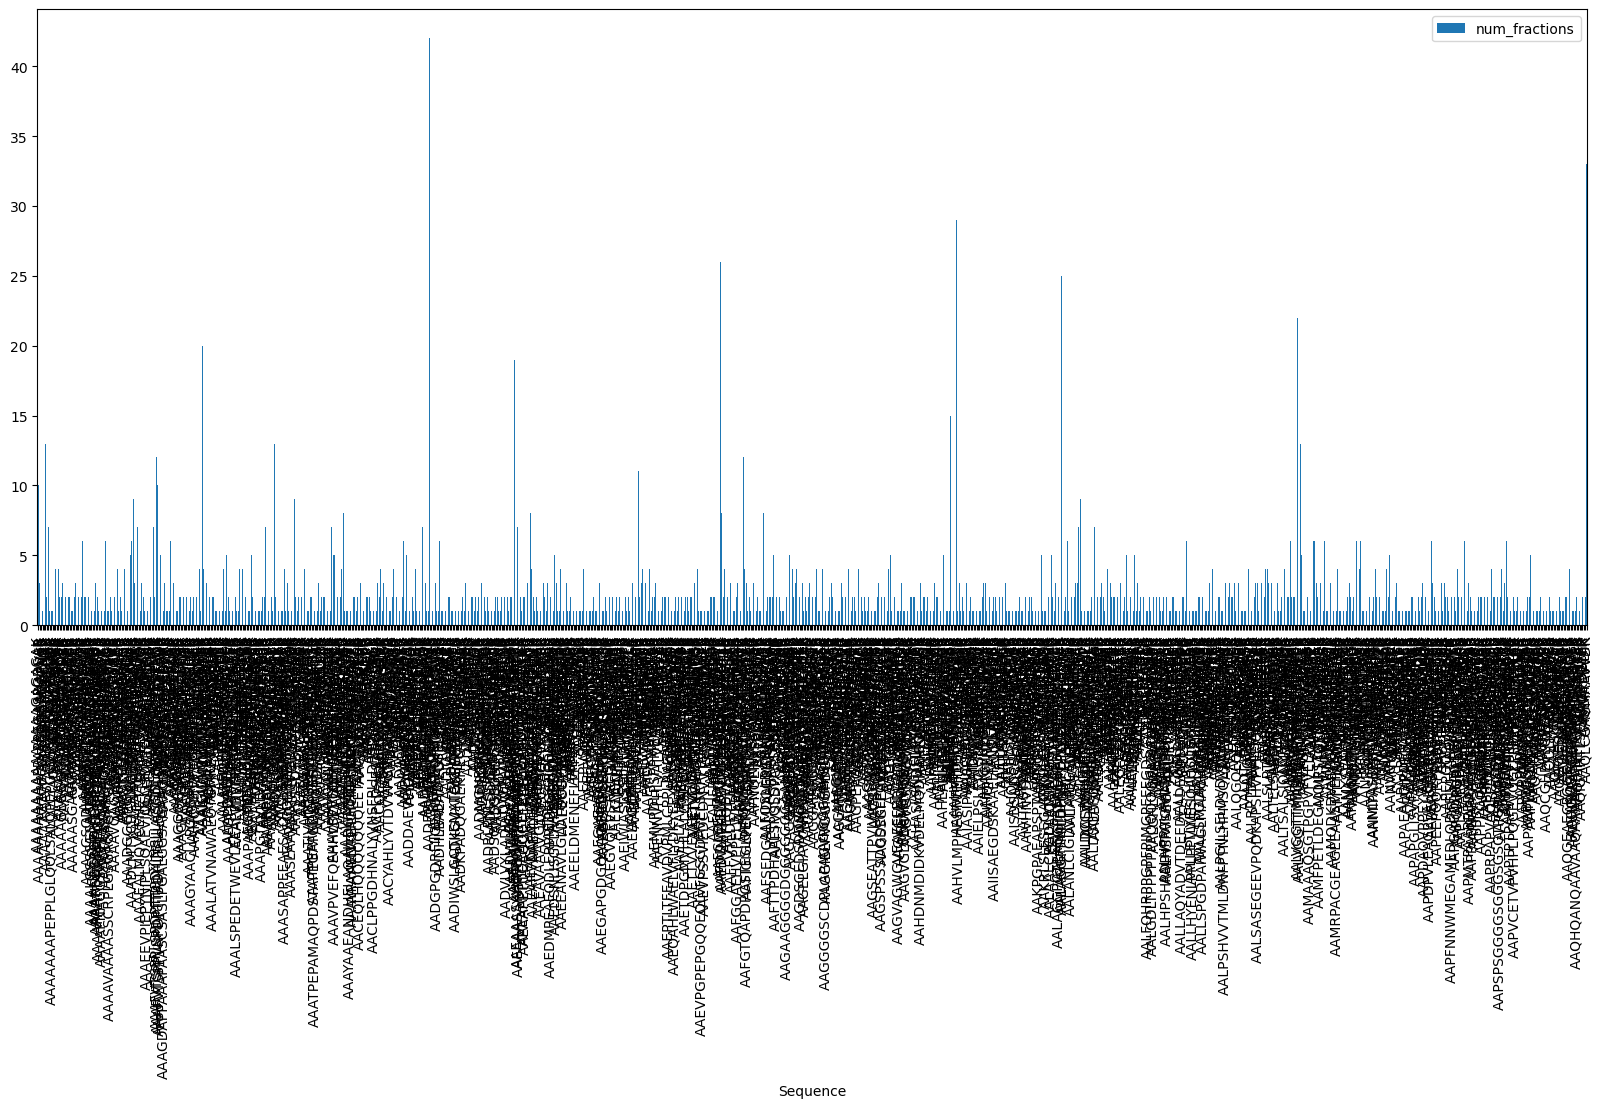

In [248]:

df_unique_seq_51.plot.bar(x='Sequence', y='num_fractions', figsize = (20,8))
# which proteins appear in how many fractions

C:\Users\cocob\AppData\Local\Temp\ipykernel_30184\210928955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Color'] = pd.Categorical(df_top[cat]).codes


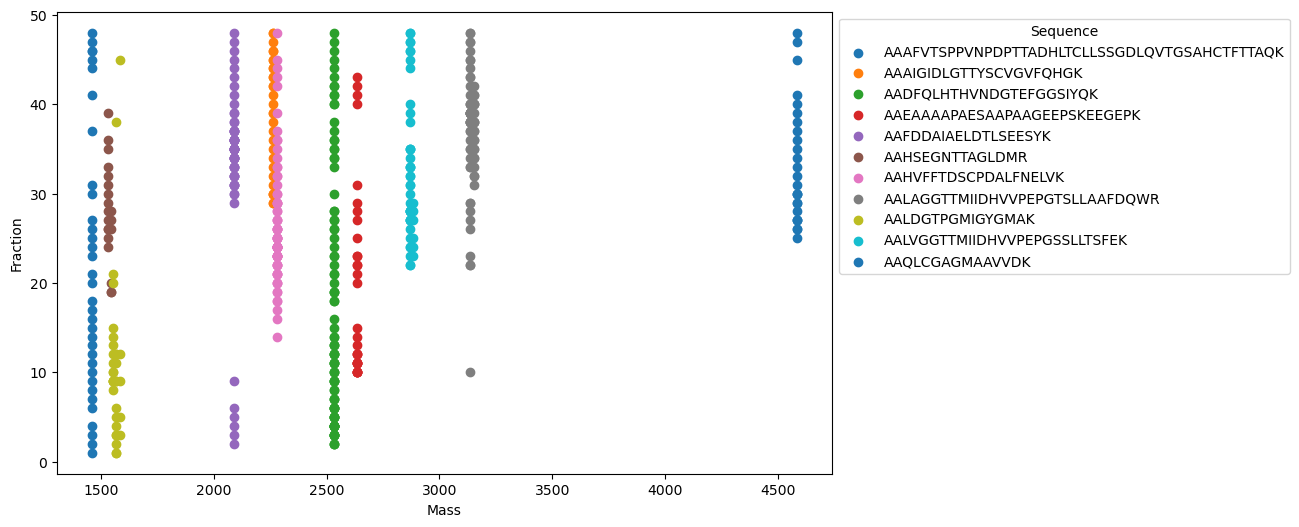

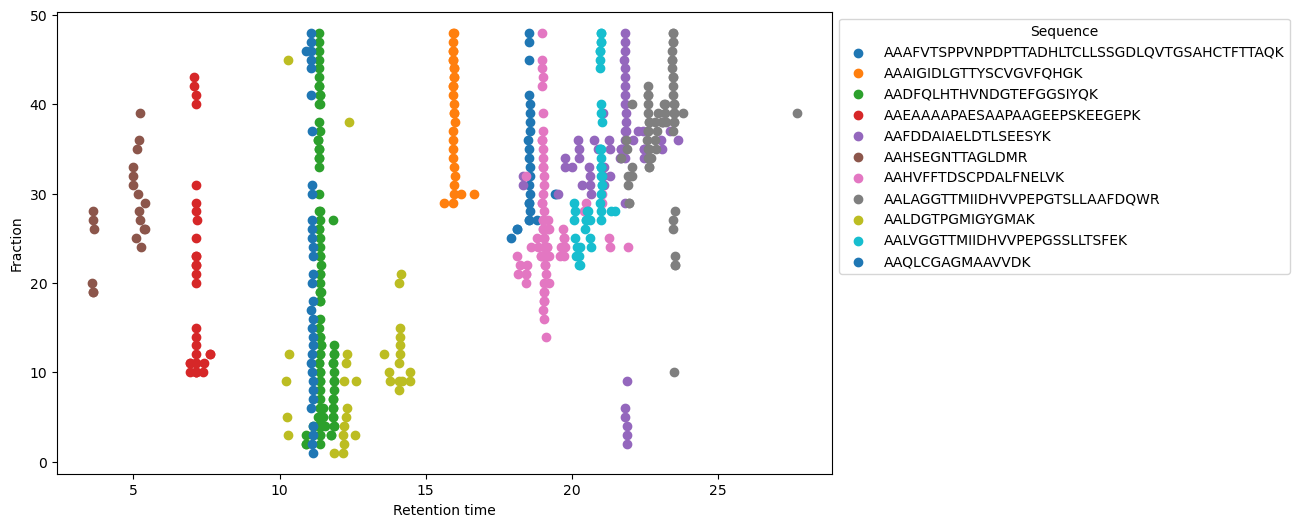

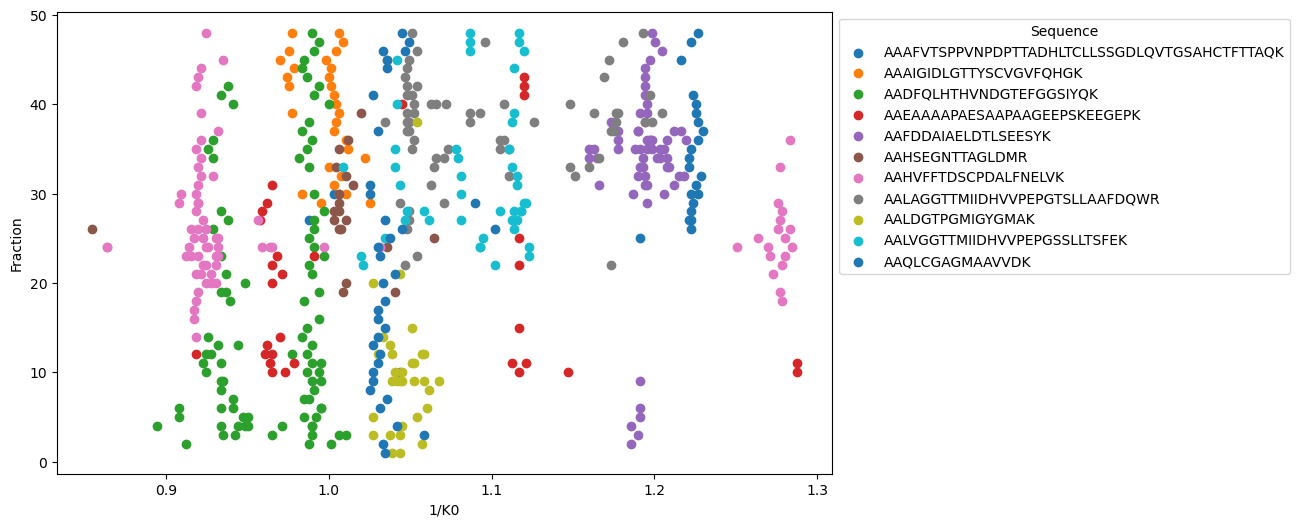

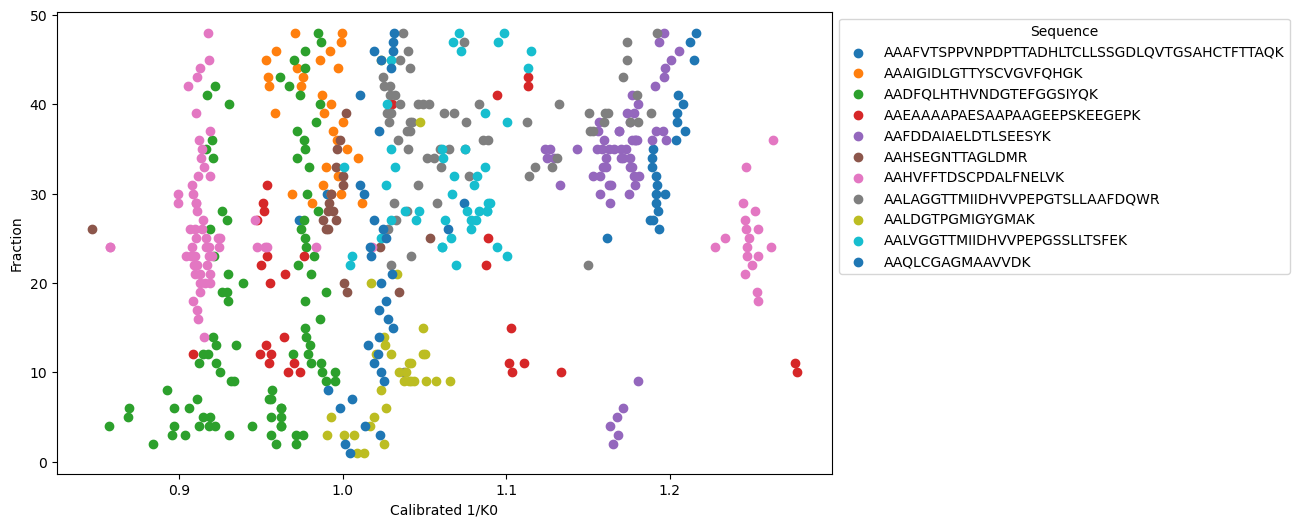

In [301]:
df_top_ten_51= get_peptides_across_many_fractions(df_51, 15)

plot_scatter( df_top_ten_51,y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_51, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_51, y='Fraction', x= '1/K0', c='Sequence')

plot_scatter(df_top_ten_51, y='Fraction', x= 'Calibrated 1/K0', c='Sequence')

C:\Users\cocob\AppData\Local\Temp\ipykernel_30184\210928955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Color'] = pd.Categorical(df_top[cat]).codes


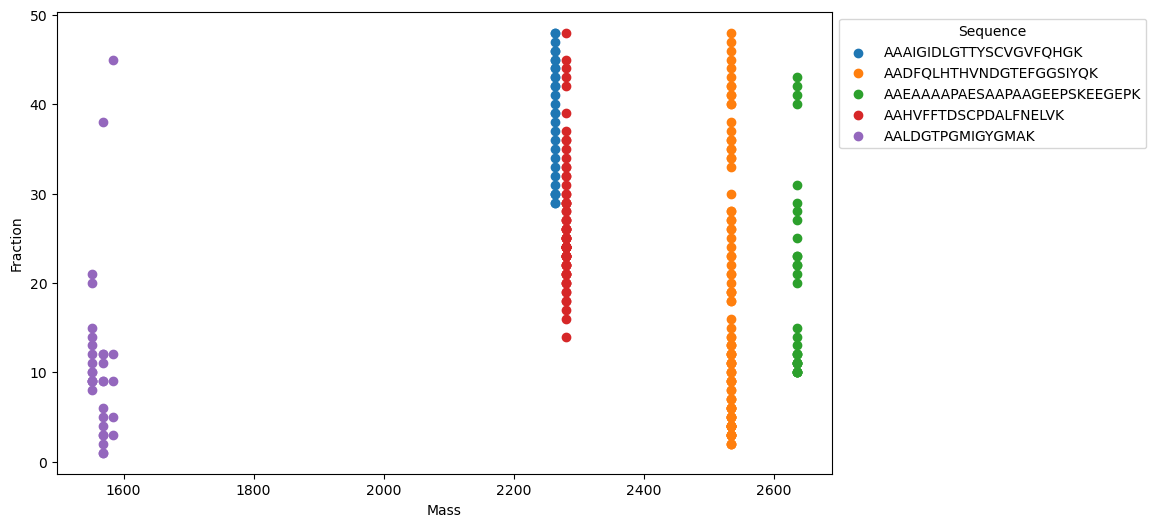

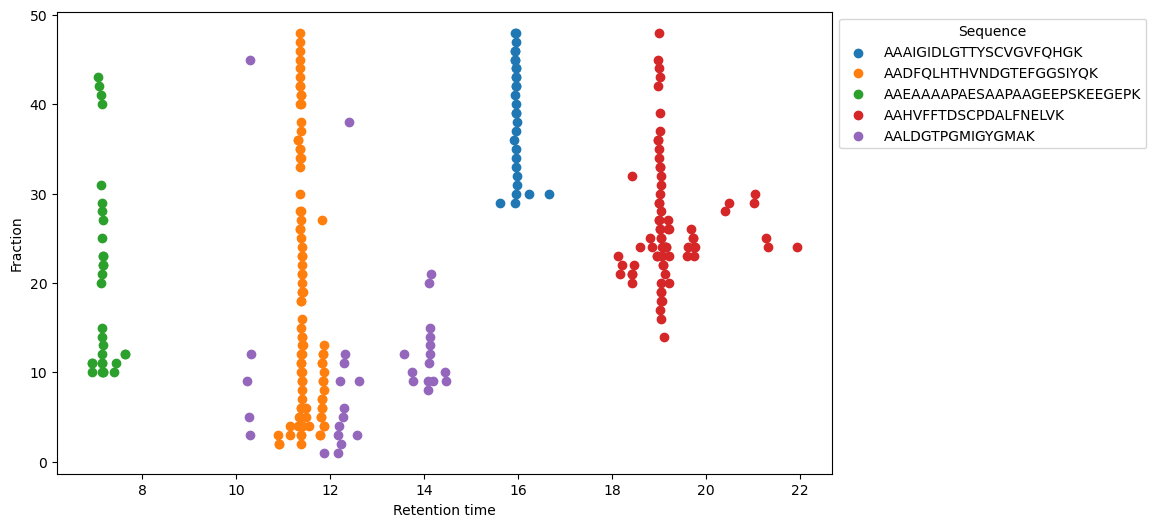

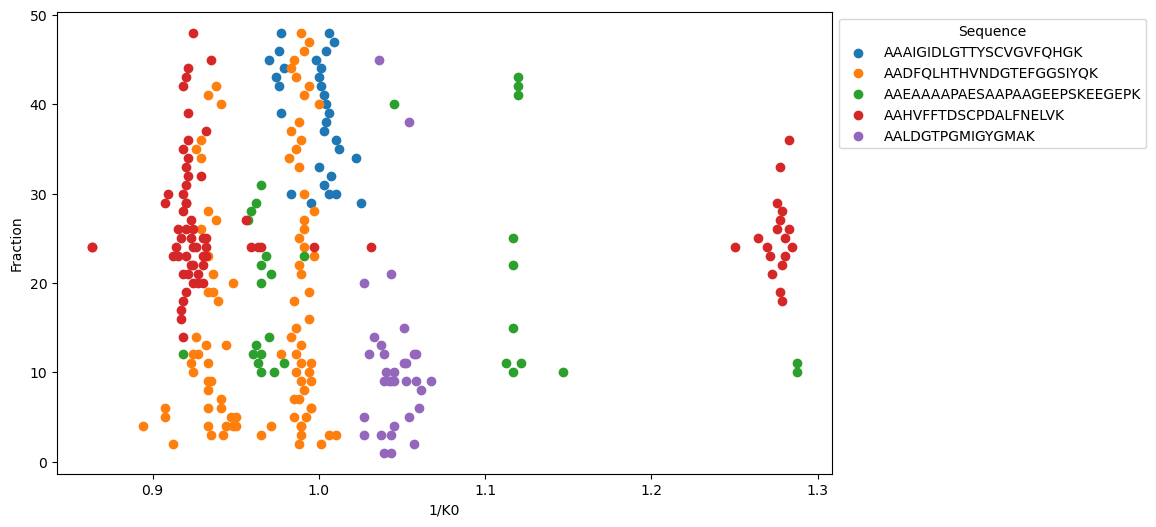

In [288]:
df_top_ten_51= get_peptides_across_many_fractions(df_51, 15)

plot_scatter( df_top_ten_51[df_top_ten_51['Sequence'].isin(top_5_seqs)] ,y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_51[df_top_ten_51['Sequence'].isin(top_5_seqs)], y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_51[df_top_ten_51['Sequence'].isin(top_5_seqs)], y='Fraction', x= '1/K0', c='Sequence')

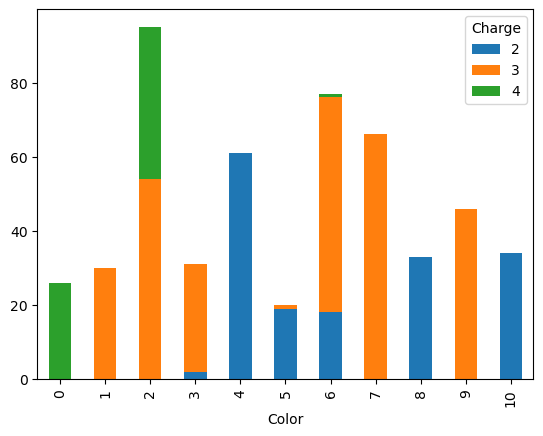

In [ ]:
pivot_table = df_top_ten_51.pivot_table(index='Sequence', columns='Charge', aggfunc='size', fill_value=0)
ax = pivot_table.plot.bar(stacked=True)
plt.show()

#### Variance in Values

<Axes: title={'center': 'CCS'}, xlabel='[Color, Charge]'>

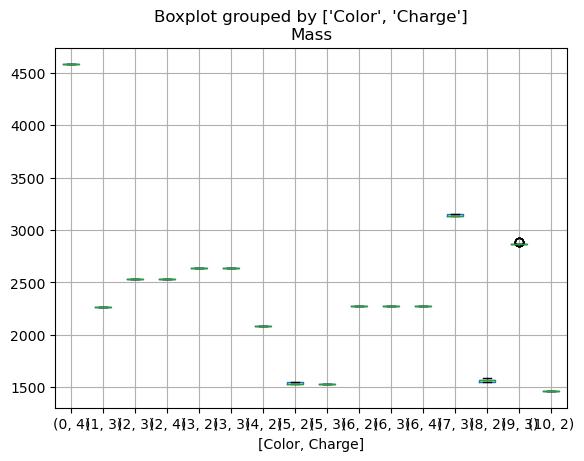

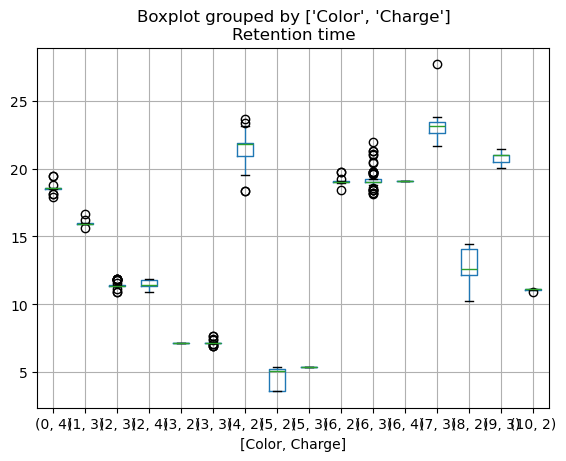

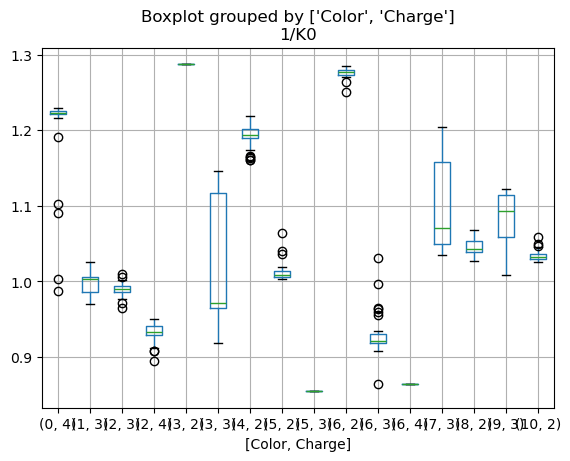

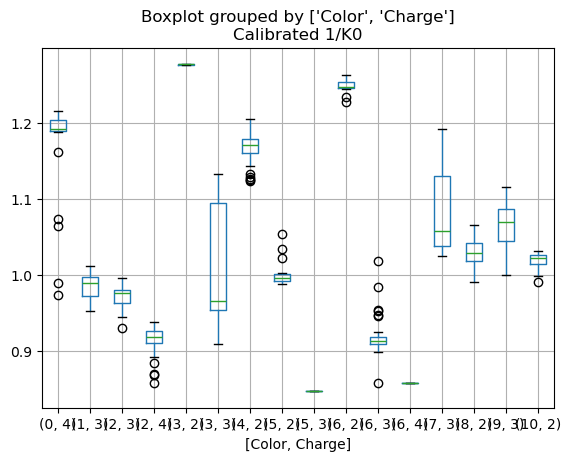

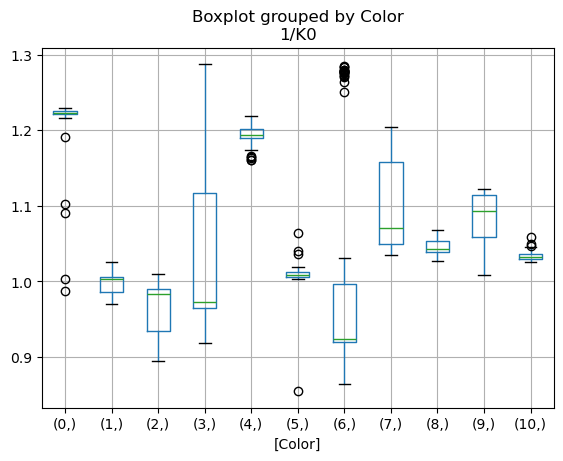

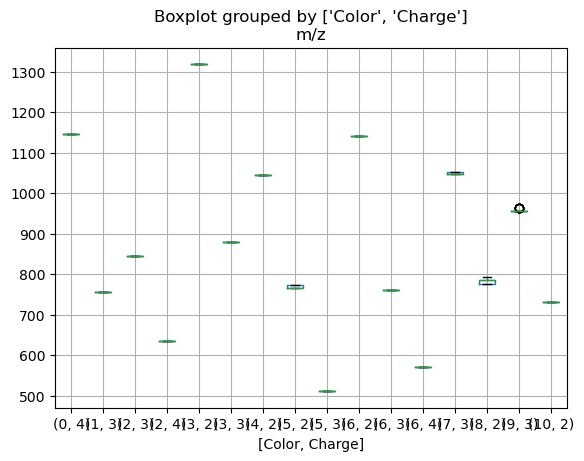

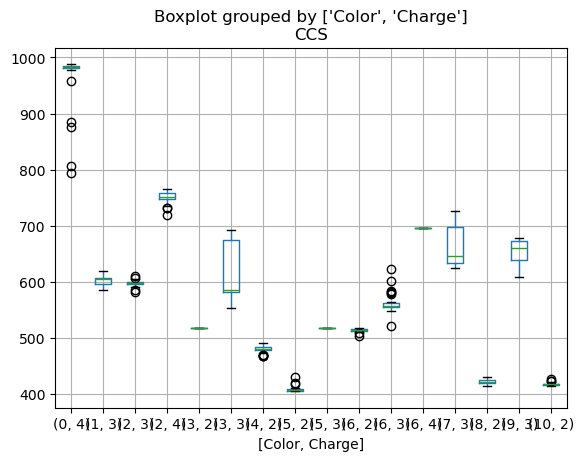

In [302]:
df_top_ten_51.boxplot(by=['Color','Charge'], column='Mass')
df_top_ten_51.boxplot(by=['Color','Charge'], column='Retention time')
df_top_ten_51.boxplot(by=['Color','Charge'], column='1/K0')
df_top_ten_51.boxplot(by=['Color','Charge'], column='Calibrated 1/K0')
df_top_ten_51.boxplot(by=['Color'], column='1/K0')
df_top_ten_51.boxplot(by=['Color','Charge'], column='m/z')
df_top_ten_51.boxplot(by=['Color','Charge'], column='CCS')

##### Investigate Seq 3_3(highest IM Variance)

29 Measurements <br>
all the same mass <br>
all the same Charge <br>
RT within 1 unit (6.9-7.7) <br>

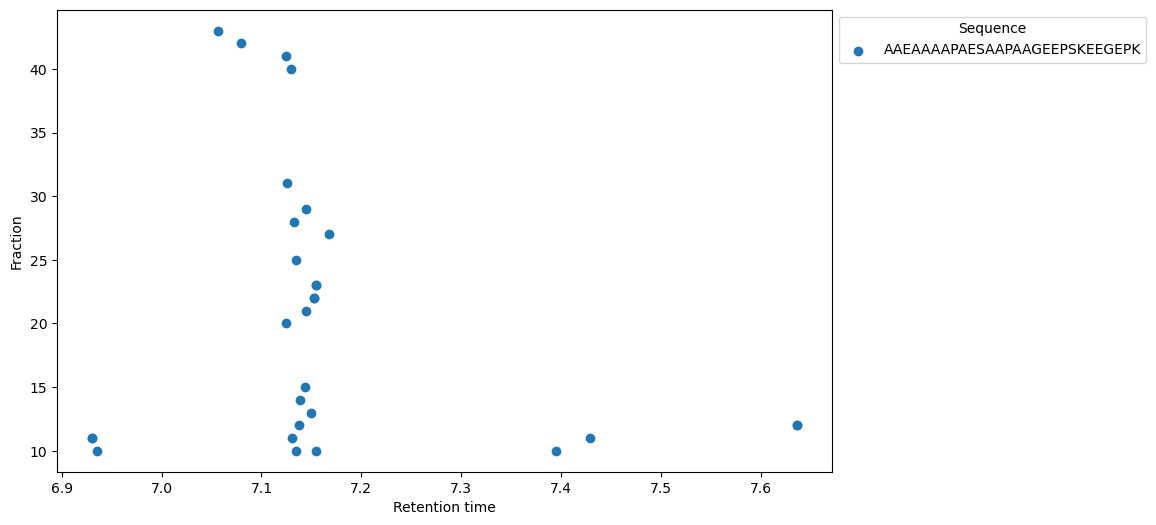

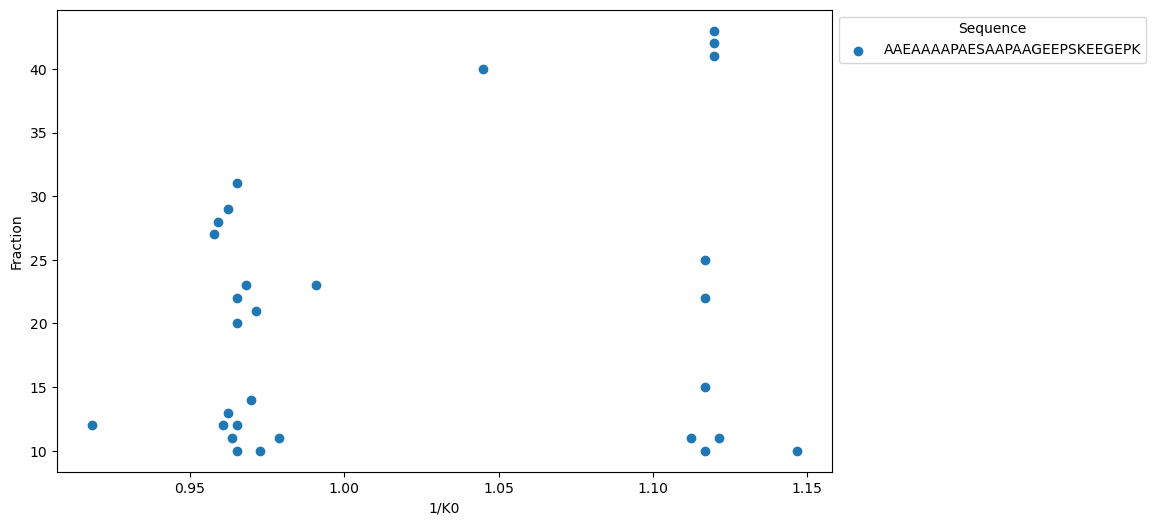

In [ ]:
df_seq_51_3_3 =df_top_ten_51[(df_top_ten_51['Color'] == 3) &( df_top_ten_51['Charge'] == 3)]
plot_scatter(df_seq_51_3_3, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_seq_51_3_3, y='Fraction', x= '1/K0', c='Sequence')

Look at fractions where IM is off <br>
Split in 5(4) regions: (12)(40)(10) <br>
IM values off in 10 and 12 are not the only measurements in those fractions (RT for them not significant)

same observation in all experiments??

Pep, score, delta score

plot 1/k0 length in the plot( as range around point)
match k0 difference

### Experiment 64

In [ ]:
# look at proteins
# over different fractions
df_proteins_64 = df_64.sort_values(by='Proteins', ignore_index=True)
df_proteins_64 = df_proteins_64.drop_duplicates(subset=['Sequence', 'Fraction', 'Experiment', 'Proteins'], ignore_index=True)
df_proteins_64 = df_proteins_64[['Sequence', 'Fraction', 'Experiment', 'Proteins']]

# make new table with unique sequence, in how many fractions and how many experiments
df_unique_seq_64 = df_proteins_64[['Sequence', 'Fraction', 'Experiment']]

df_unique_seq_64 = df_unique_seq_64.groupby('Sequence').agg({'Experiment': 'nunique', 'Fraction': 'nunique'}).reset_index()

# Rename the columns for clarity
df_unique_seq_64.columns = ['Sequence', 'num_experiments', 'num_fractions']


<Axes: xlabel='Sequence'>

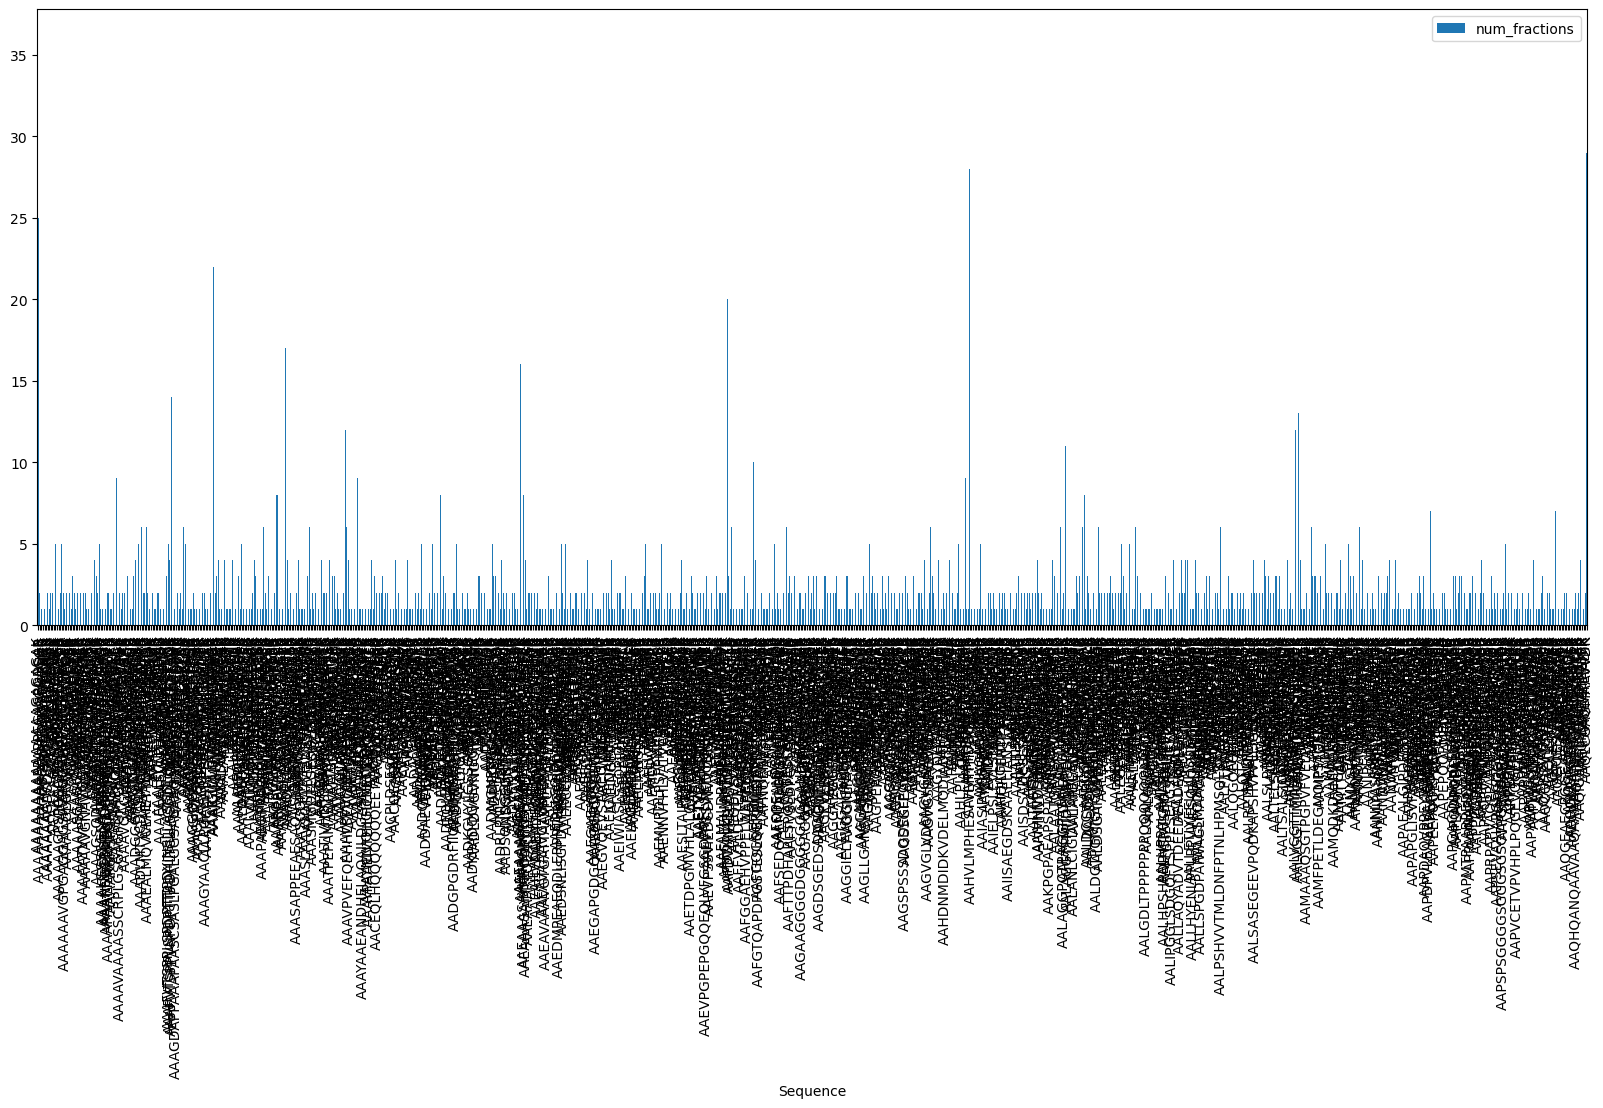

In [ ]:
df_unique_seq_64.plot.bar(x='Sequence', y='num_fractions', figsize = (20,8))
# which proteins appear in how many fractions

plothistograms look at little peaks

C:\Users\cocob\AppData\Local\Temp\ipykernel_30184\210928955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Color'] = pd.Categorical(df_top[cat]).codes


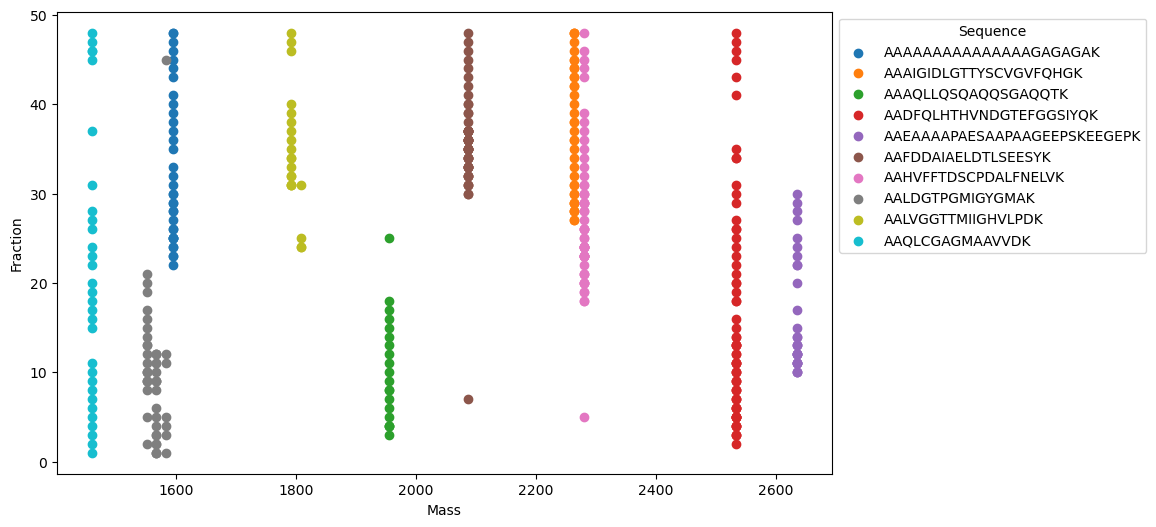

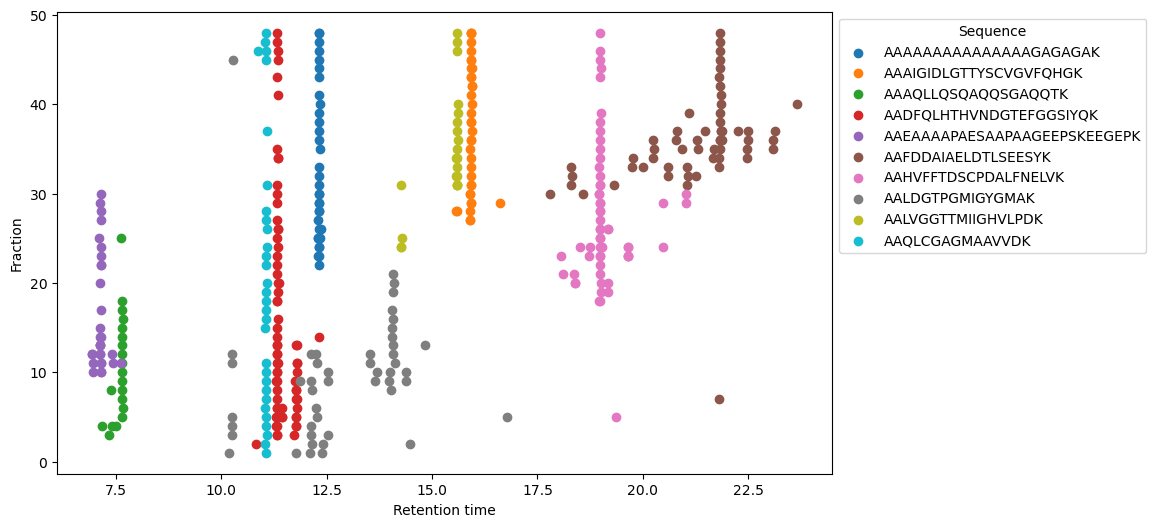

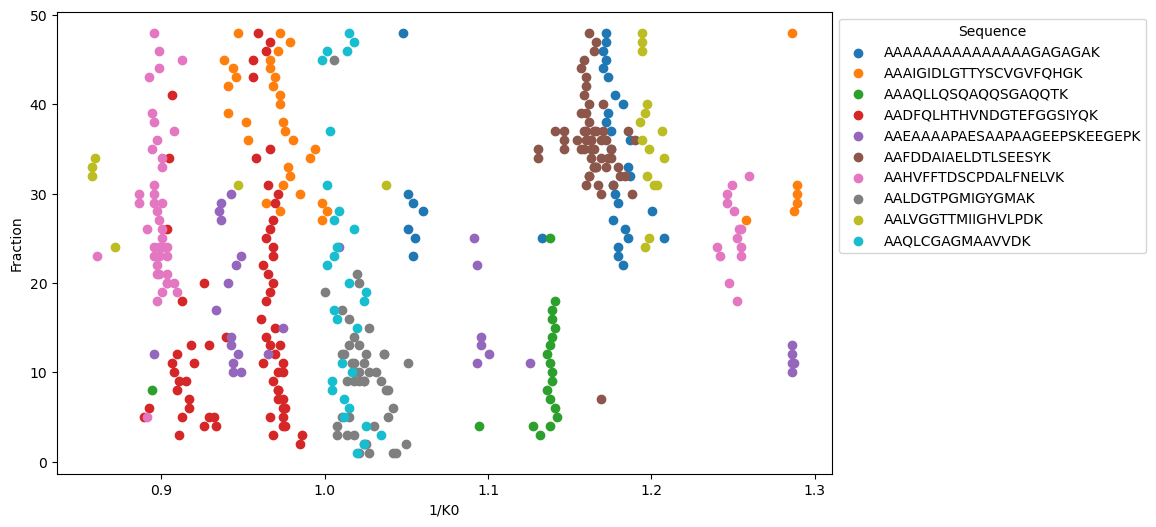

In [258]:
# explore sequences which appear in many fractions
df_top_ten_64 = get_peptides_across_many_fractions(df_64, 15)
plot_scatter( df_top_ten_64,y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_64, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_64, y='Fraction', x= '1/K0', c='Sequence')

C:\Users\cocob\AppData\Local\Temp\ipykernel_30184\210928955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Color'] = pd.Categorical(df_top[cat]).codes


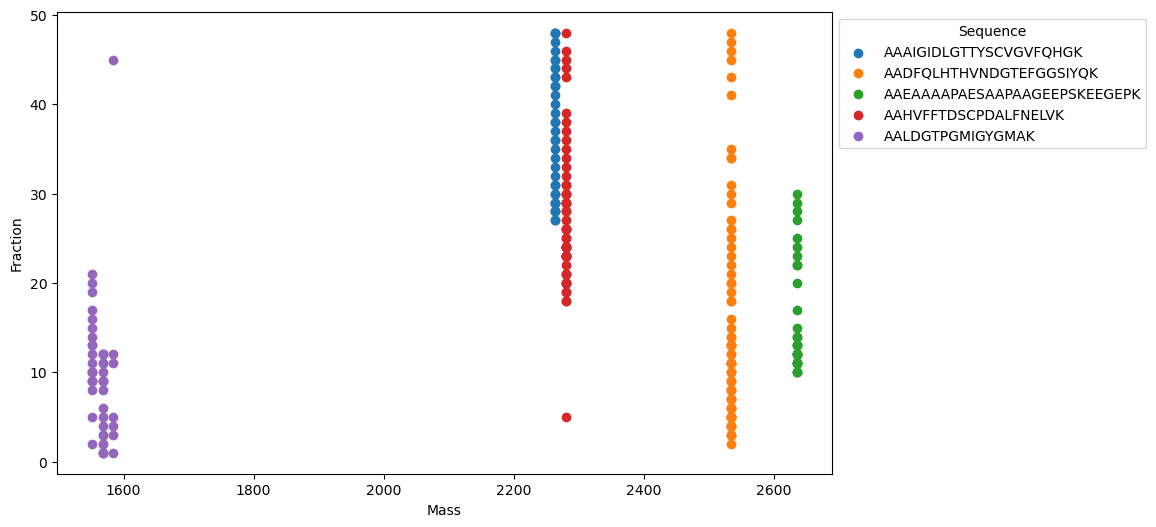

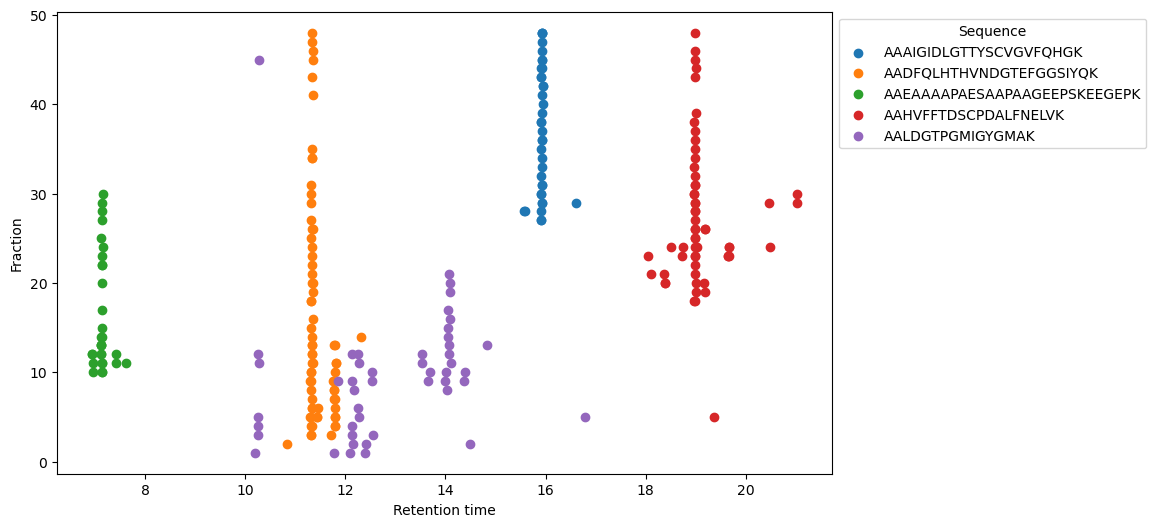

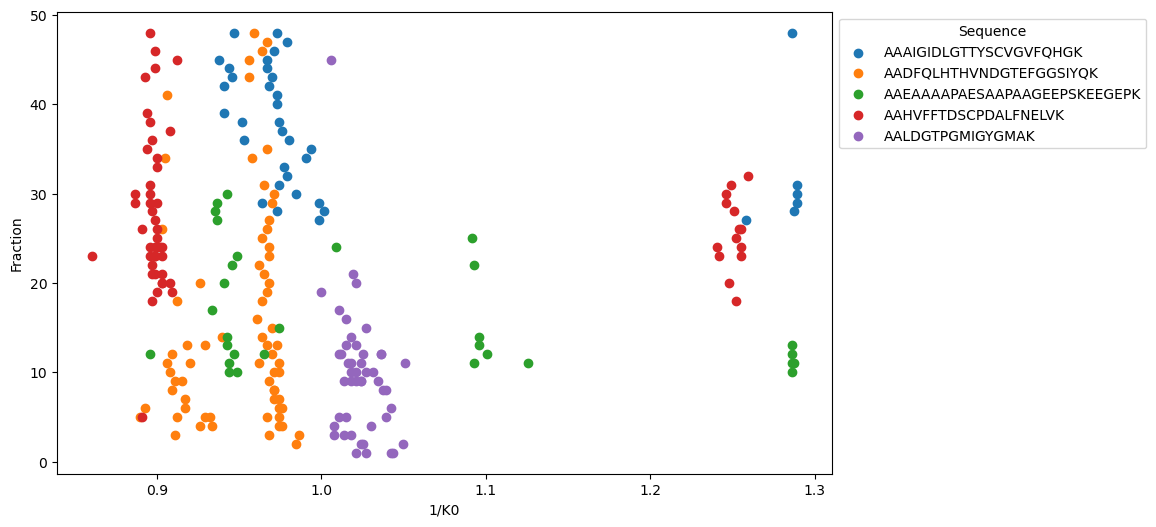

In [289]:
df_top_ten_64 = get_peptides_across_many_fractions(df_64, 15)
plot_scatter( df_top_ten_64[df_top_ten_64['Sequence'].isin(top_5_seqs)],y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_64[df_top_ten_64['Sequence'].isin(top_5_seqs)], y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_64[df_top_ten_64['Sequence'].isin(top_5_seqs)], y='Fraction', x= '1/K0', c='Sequence')

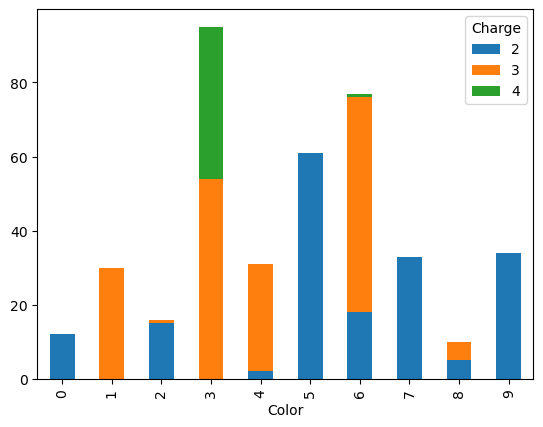

In [ ]:
pivot_table = df_top_ten_64.pivot_table(index='Color', columns='Charge', aggfunc='size', fill_value=0)
ax = pivot_table.plot.bar(stacked=True)
plt.show()

<Axes: title={'center': 'CCS'}, xlabel='[Color, Charge]'>

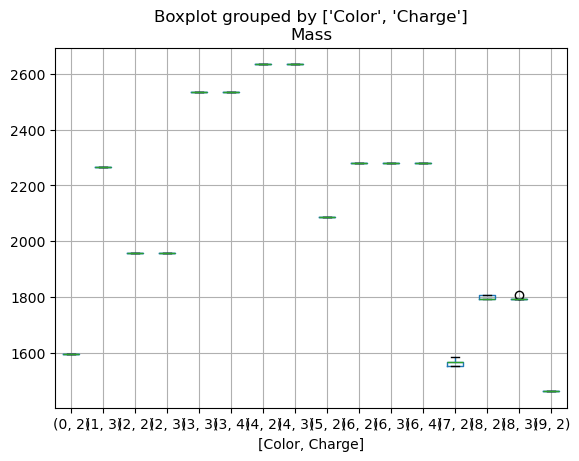

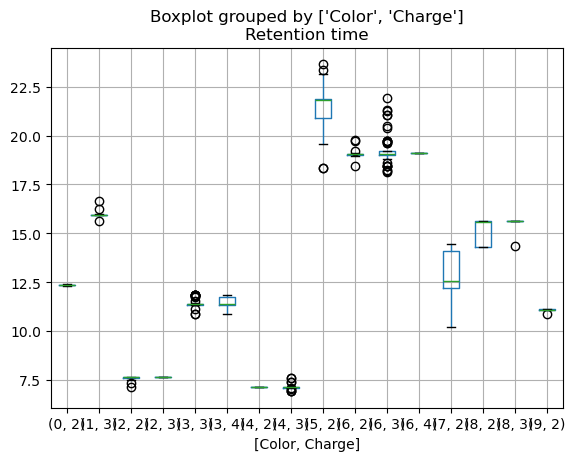

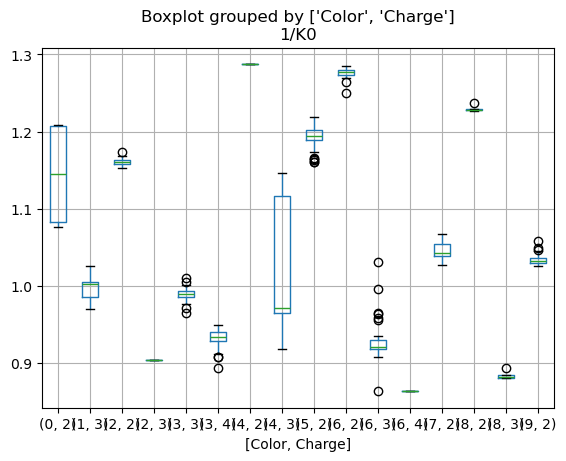

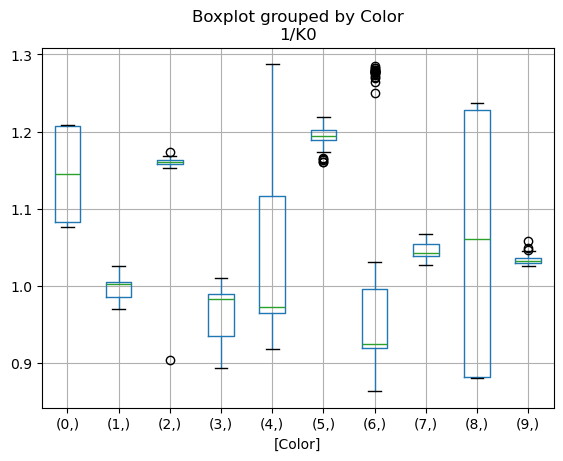

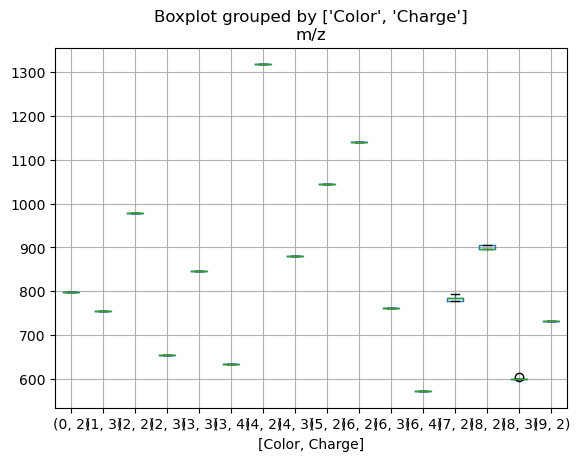

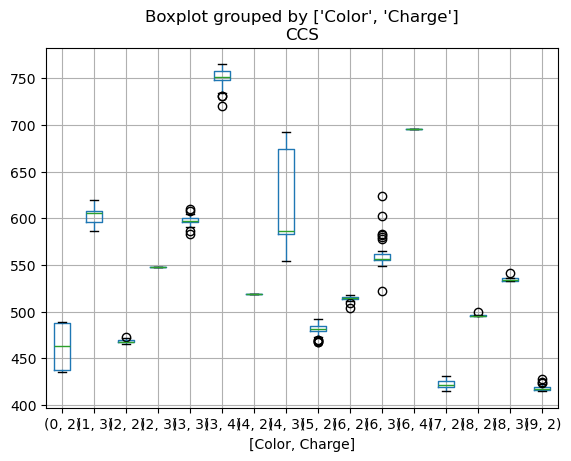

In [ ]:
df_top_ten_64.boxplot(by=['Color','Charge'], column='Mass')
df_top_ten_64.boxplot(by=['Color','Charge'], column='Retention time')
df_top_ten_64.boxplot(by=['Color','Charge'], column='1/K0')
df_top_ten_64.boxplot(by=['Color'], column='1/K0')
df_top_ten_64.boxplot(by=['Color','Charge'], column='m/z')
df_top_ten_64.boxplot(by=['Color','Charge'], column='CCS')

##### Investigate Seq 4_3(highest IM Variance)

TODO
29 Measurements <br>
all the same mass <br>
all the same Charge <br>
RT within 1 unit (6.9-7.7) <br>

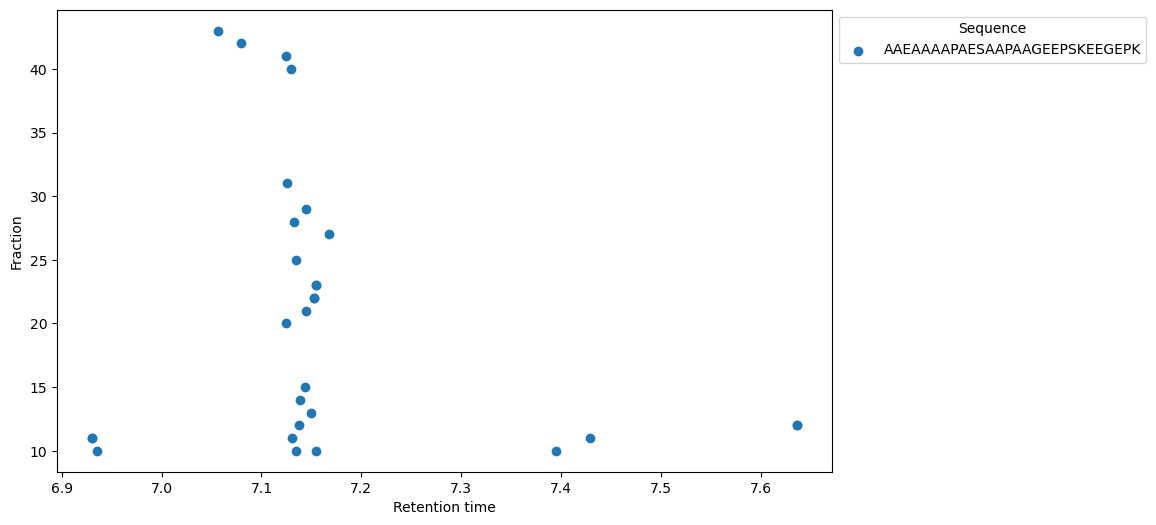

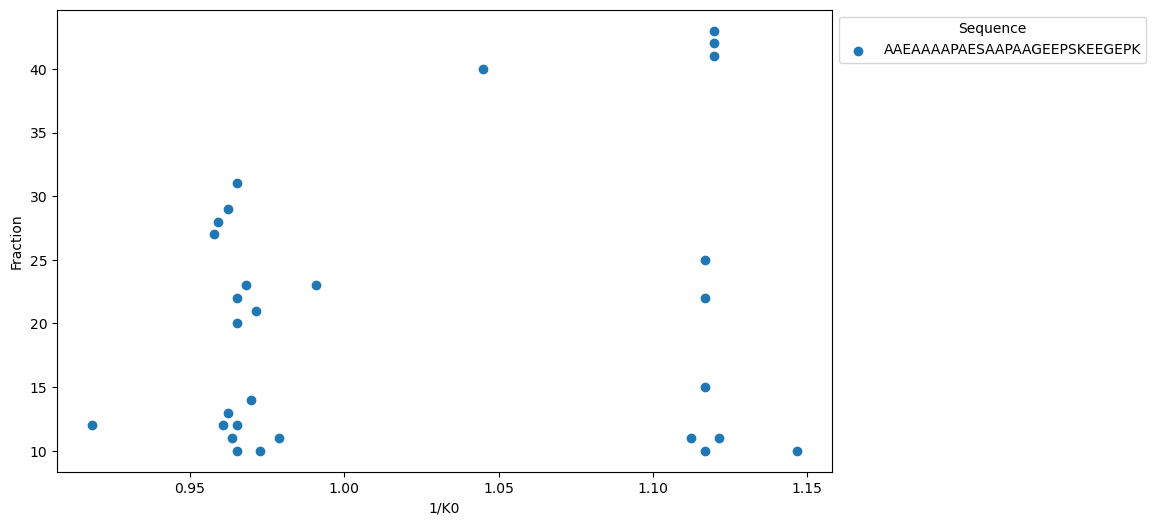

In [ ]:
df_seq_64_3_3 =df_top_ten_64[(df_top_ten_64['Color'] == 3) &( df_top_ten_64['Charge'] == 3)]
plot_scatter(df_seq_64_3_3, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_seq_64_3_3, y='Fraction', x= '1/K0', c='Sequence')

Look at fractions where IM is off <br>
Split in 5(4) regions: (12)(40)(10) <br>
IM values off in 10 and 12 are not the only measurements in those fractions (RT for them not significant)

same observation in all experiments??

### Experiment 28

In [ ]:
# look at proteins
# over different fractions
df_proteins_28 = df_28.sort_values(by='Proteins', ignore_index=True)
df_proteins_28 = df_proteins_28.drop_duplicates(subset=['Sequence', 'Fraction', 'Experiment', 'Proteins'], ignore_index=True)
df_proteins_28 = df_proteins_28[['Sequence', 'Fraction', 'Experiment', 'Proteins']]

# make new table with unique sequence, in how many fractions and how many experiments
df_unique_seq_28 = df_proteins_28[['Sequence', 'Fraction', 'Experiment']]

df_unique_seq_28 = df_unique_seq_28.groupby('Sequence').agg({'Experiment': 'nunique', 'Fraction': 'nunique'}).reset_index()

# Rename the columns for clarity
df_unique_seq_28.columns = ['Sequence', 'num_experiments', 'num_fractions']


<Axes: xlabel='Sequence'>

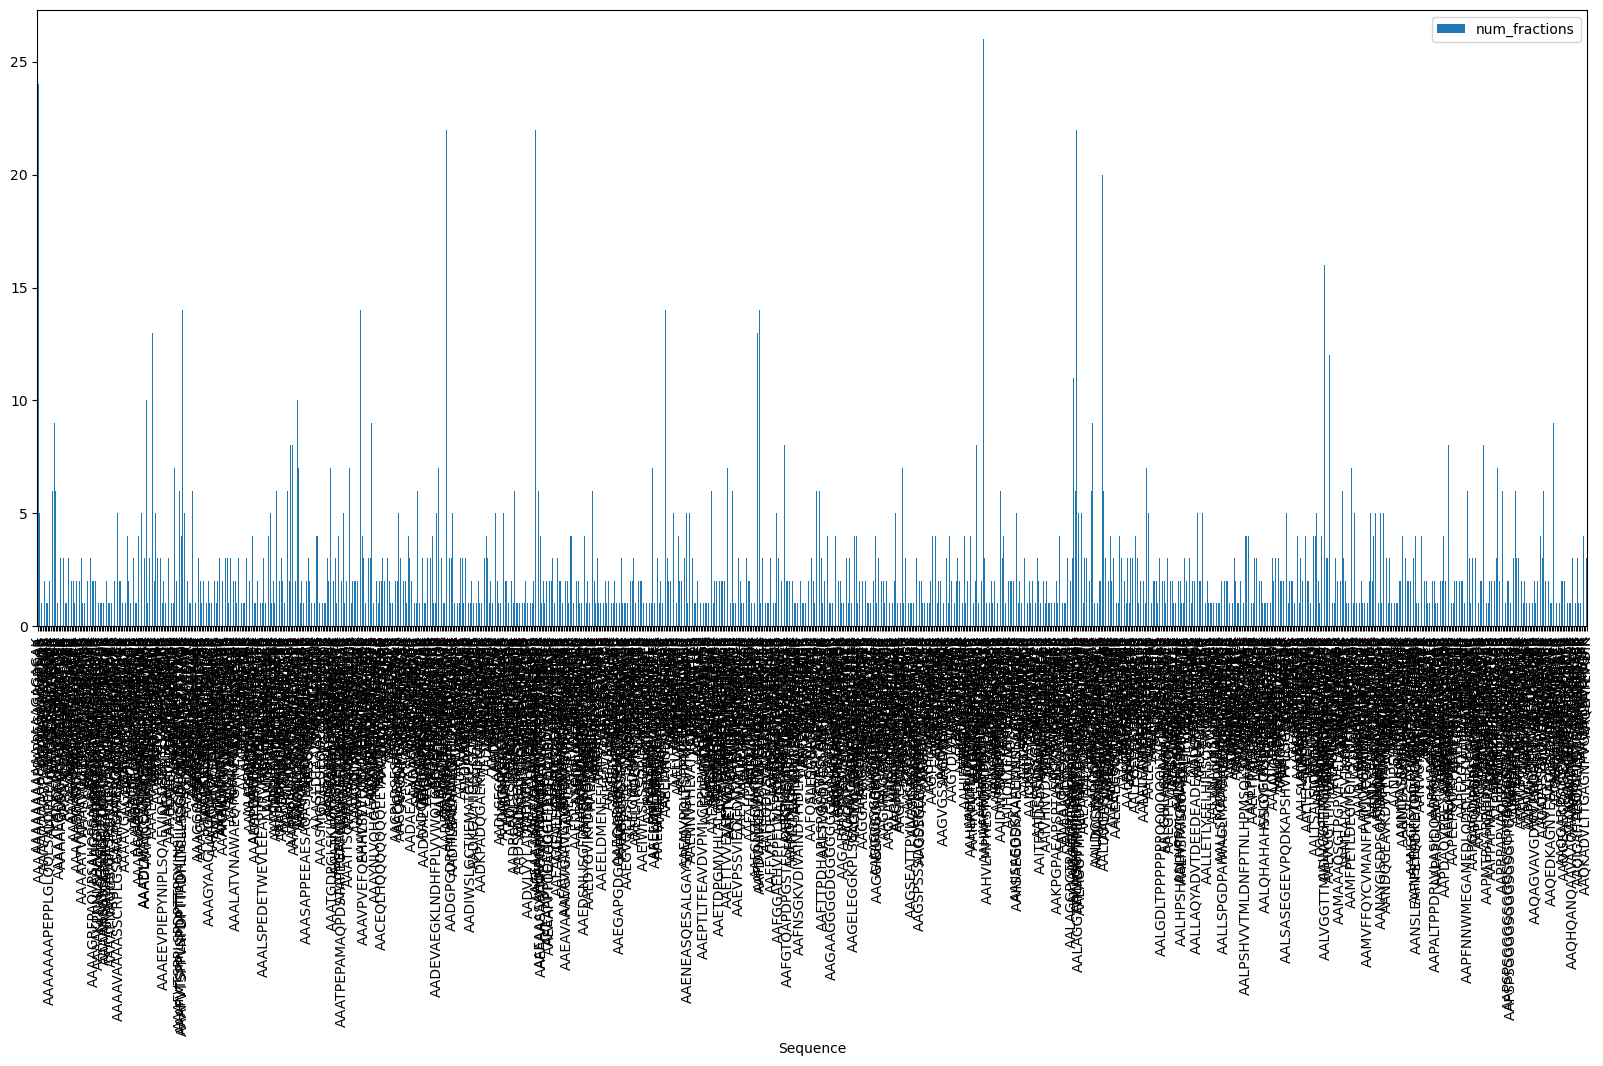

In [ ]:
df_unique_seq_28.plot.bar(x='Sequence', y='num_fractions', figsize = (20,8))
# which proteins appear in how many fractions

C:\Users\cocob\AppData\Local\Temp\ipykernel_30184\210928955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Color'] = pd.Categorical(df_top[cat]).codes


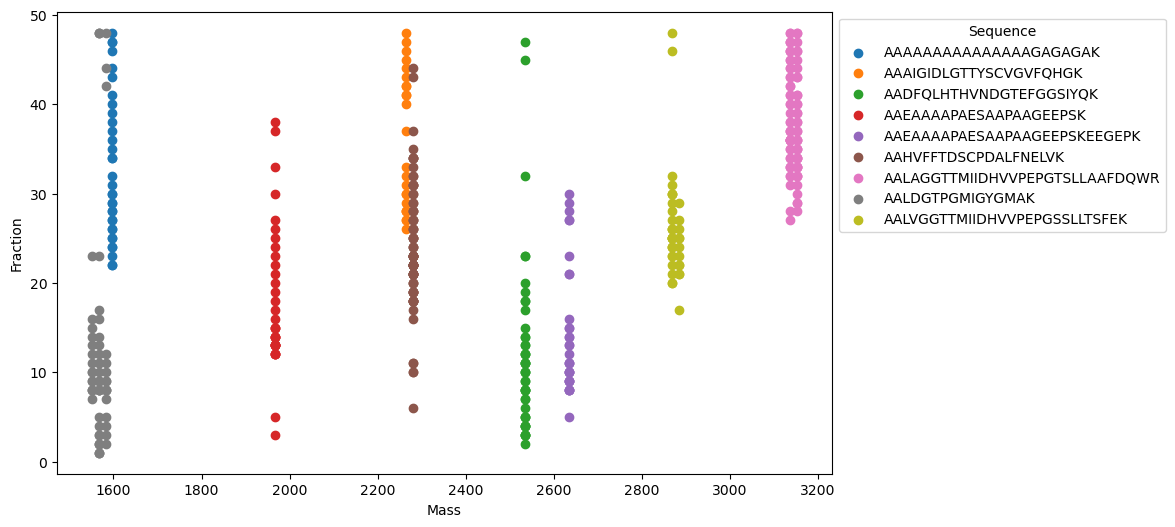

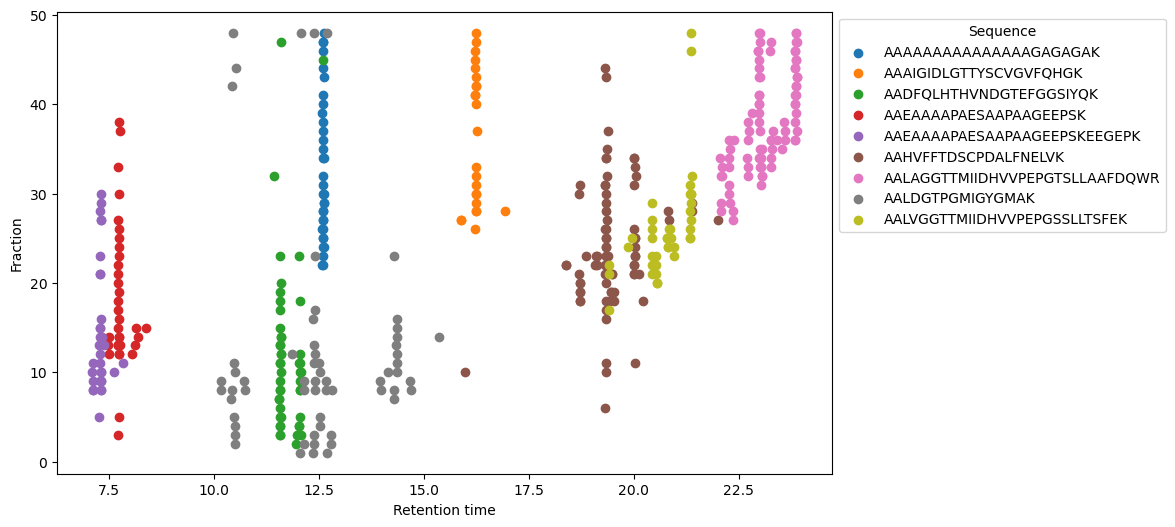

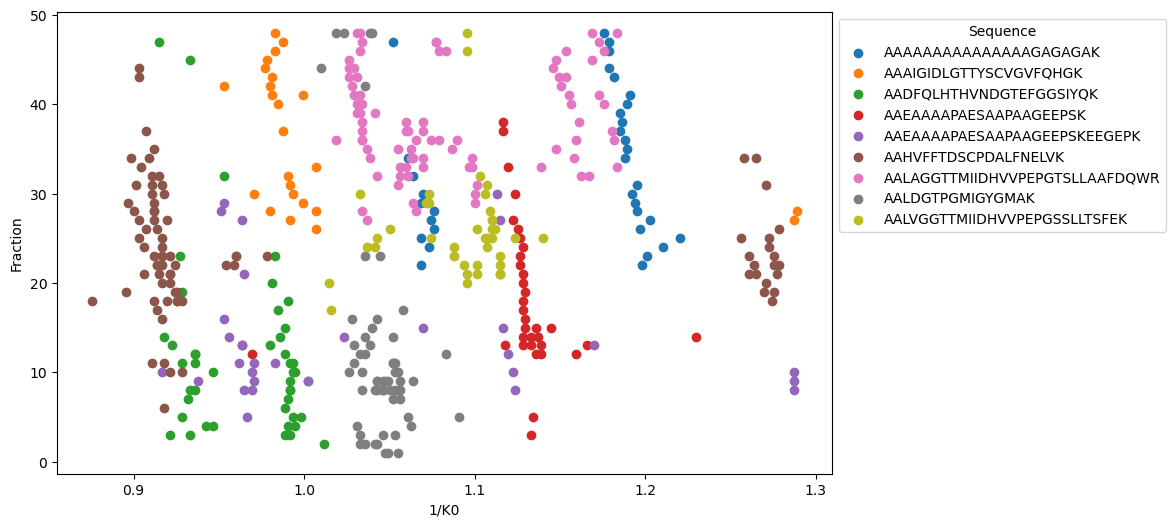

In [259]:
df_top_ten_28 = get_peptides_across_many_fractions(df_28, 15)

plot_scatter( df_top_ten_28,y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_28, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_28, y='Fraction', x= '1/K0', c='Sequence')

C:\Users\cocob\AppData\Local\Temp\ipykernel_30184\210928955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Color'] = pd.Categorical(df_top[cat]).codes


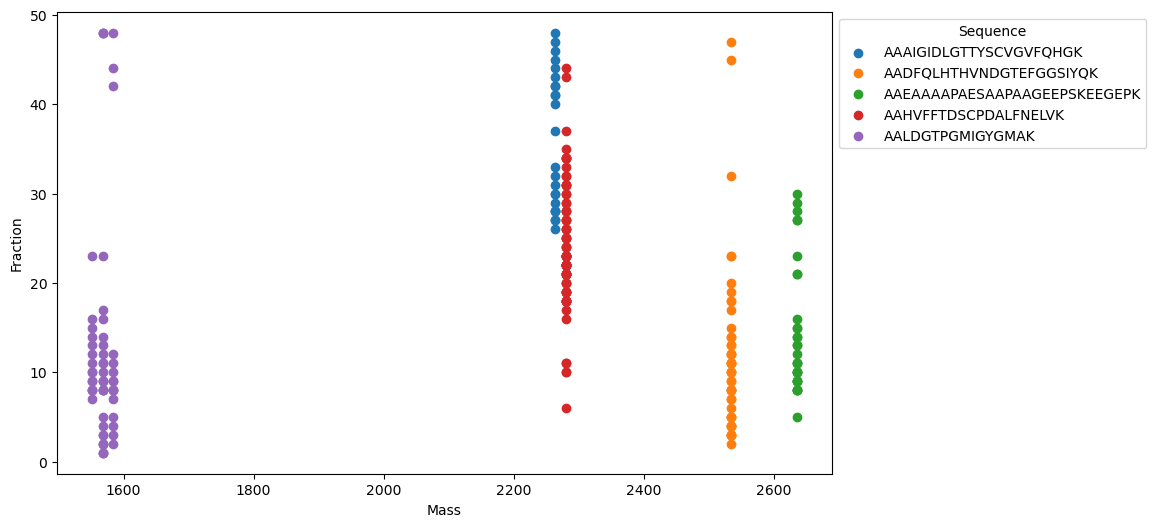

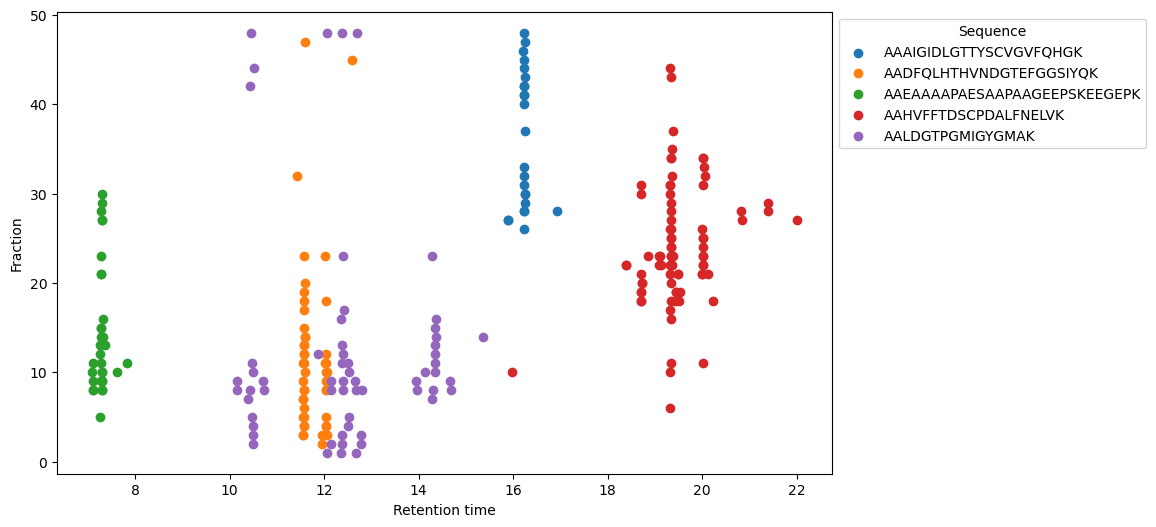

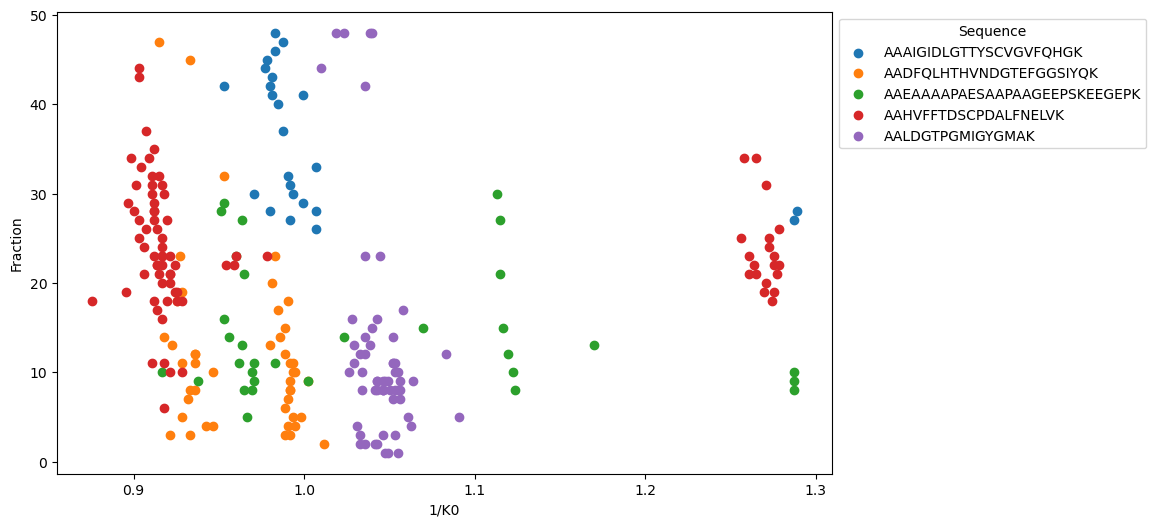

In [290]:
df_top_ten_28 = get_peptides_across_many_fractions(df_28, 15)
plot_scatter( df_top_ten_28[df_top_ten_28['Sequence'].isin(top_5_seqs)],y='Fraction', x= 'Mass', c='Sequence')
plot_scatter(df_top_ten_28[df_top_ten_28['Sequence'].isin(top_5_seqs)], y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_top_ten_28[df_top_ten_28['Sequence'].isin(top_5_seqs)], y='Fraction', x= '1/K0', c='Sequence')

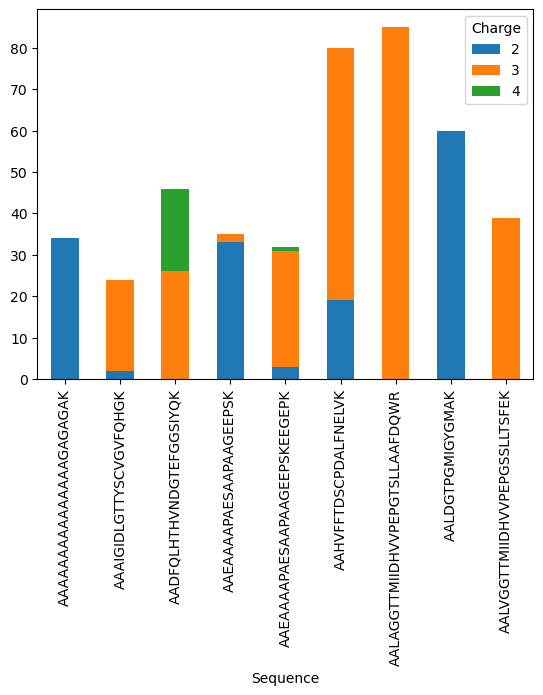

In [ ]:
pivot_table = df_top_ten_28.pivot_table(index='Sequence', columns='Charge', aggfunc='size', fill_value=0)
ax = pivot_table.plot.bar(stacked=True)
plt.show()

<Axes: title={'center': 'CCS'}, xlabel='[Color, Charge]'>

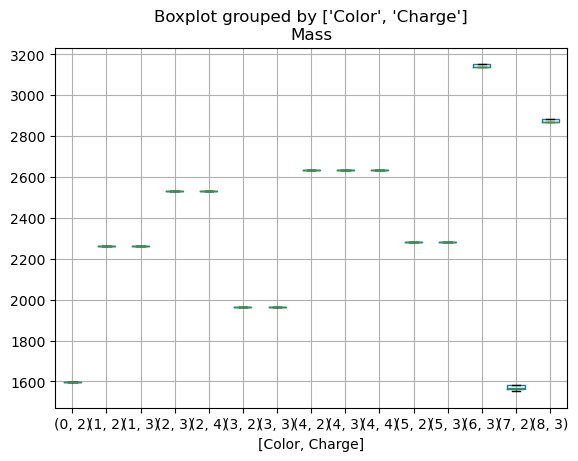

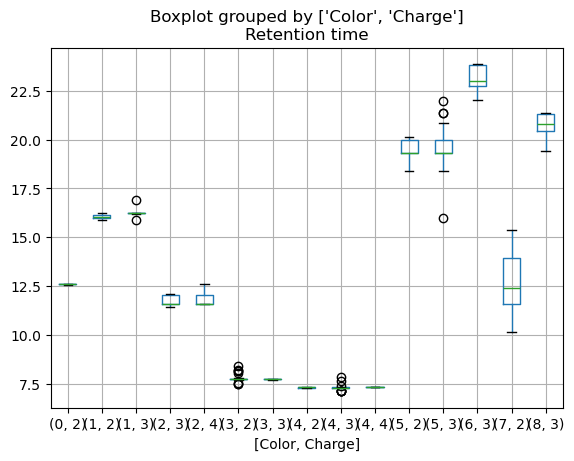

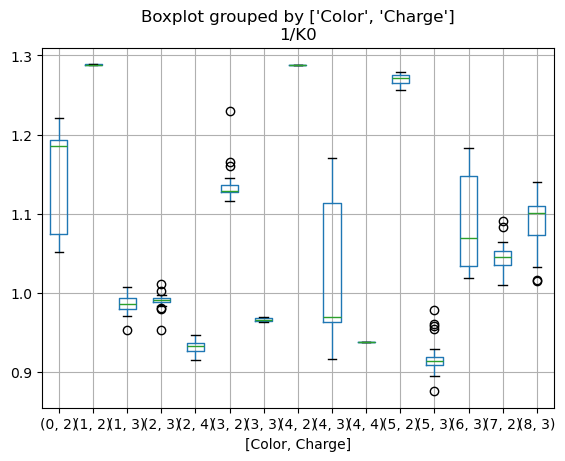

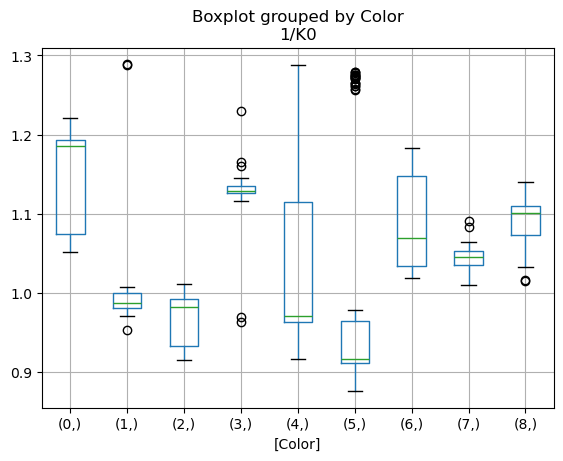

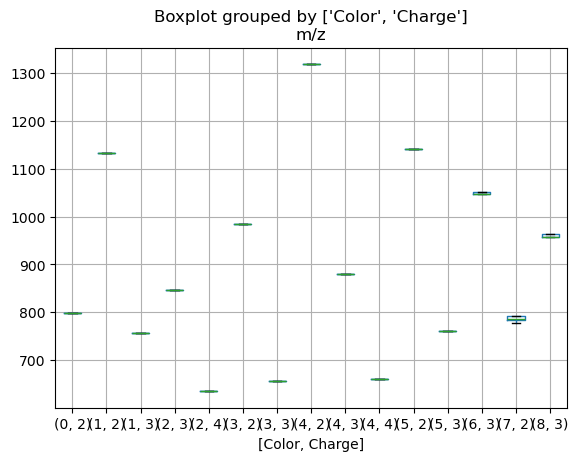

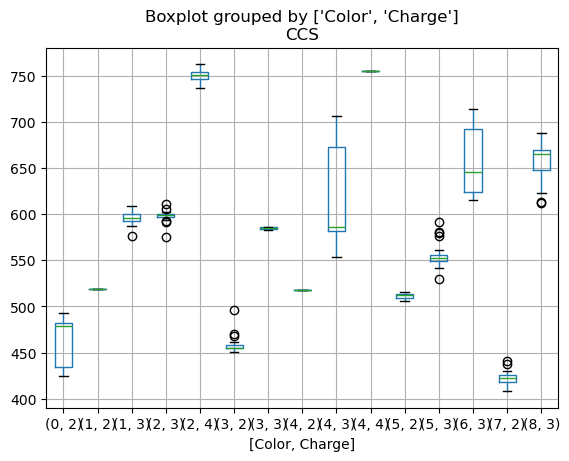

In [ ]:
df_top_ten_28.boxplot(by=['Color','Charge'], column='Mass')
df_top_ten_28.boxplot(by=['Color','Charge'], column='Retention time')
df_top_ten_28.boxplot(by=['Color','Charge'], column='1/K0')
df_top_ten_28.boxplot(by=['Color'], column='1/K0')
df_top_ten_28.boxplot(by=['Color','Charge'], column='m/z')
df_top_ten_28.boxplot(by=['Color','Charge'], column='CCS')

##### Investigate Seq 3_3(highest IM Variance)

TODO <br>
29 Measurements <br>
all the same mass <br>
all the same Charge <br>
RT within 1 unit (6.9-7.7) <br>

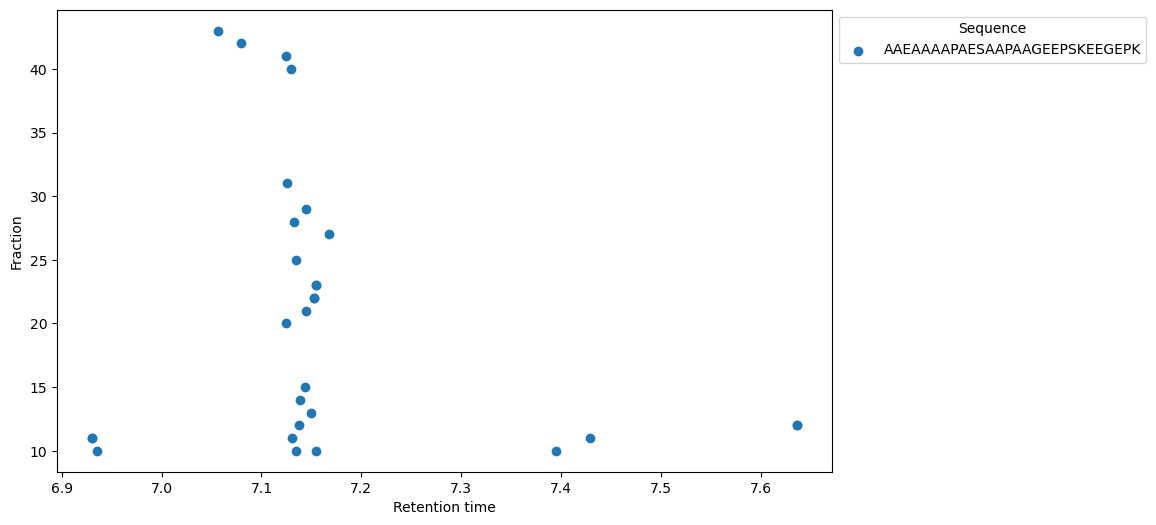

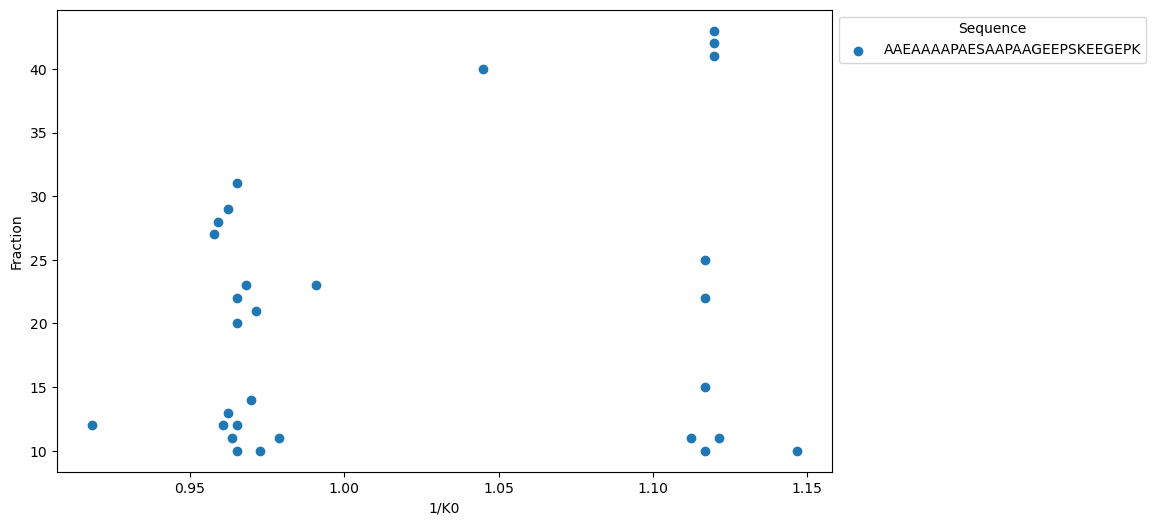

In [ ]:
df_seq_28_3_3 =df_top_ten_28[(df_top_ten_28['Color'] == 3) &( df_top_ten_28['Charge'] == 3)]
plot_scatter(df_seq_28_3_3, y='Fraction', x= 'Retention time', c='Sequence')
plot_scatter(df_seq_28_3_3, y='Fraction', x= '1/K0', c='Sequence')

Look at fractions where IM is off <br>
Split in 5(4) regions: (12)(40)(10) <br>
IM values off in 10 and 12 are not the only measurements in those fractions (RT for them not significant)

same observation in all experiments??

In [285]:
seqs_51 = df_top_ten_51['Sequence'].unique().tolist()
seqs_64 = df_top_ten_64['Sequence'].unique().tolist()
seqs_28 = df_top_ten_28['Sequence'].unique().tolist()
seqs = [seqs_51, seqs_64, seqs_28]

print(seqs_51)
print(seqs_64)
print(seqs_28)

print(len(seqs_51))
print(len(seqs_64))
print(len(seqs_28))

seqs = seqs_51 + seqs_64 + seqs_28
value_counts = {}
for seq in seqs:
    if seq in value_counts:
        value_counts[seq] += 1
    else:
        value_counts[seq] = 1
value_counts = sorted(value_counts.items(), key=lambda x:x[1], reverse=True)

# Print the counts for each value
for value, count in value_counts:
    print(f"{value}: {count} times")

top_5_seqs = ['AAAIGIDLGTTYSCVGVFQHGK', 'AADFQLHTHVNDGTEFGGSIYQK', 'AAEAAAAPAESAAPAAGEEPSKEEGEPK', 'AAHVFFTDSCPDALFNELVK', 'AALDGTPGMIGYGMAK']


['AAAFVTSPPVNPDPTTADHLTCLLSSGDLQVTGSAHCTFTTAQK', 'AAAIGIDLGTTYSCVGVFQHGK', 'AADFQLHTHVNDGTEFGGSIYQK', 'AAEAAAAPAESAAPAAGEEPSKEEGEPK', 'AAFDDAIAELDTLSEESYK', 'AAHSEGNTTAGLDMR', 'AAHVFFTDSCPDALFNELVK', 'AALAGGTTMIIDHVVPEPGTSLLAAFDQWR', 'AALDGTPGMIGYGMAK', 'AALVGGTTMIIDHVVPEPGSSLLTSFEK', 'AAQLCGAGMAAVVDK']
['AAAAAAAAAAAAAAAGAGAGAK', 'AAAIGIDLGTTYSCVGVFQHGK', 'AAAQLLQSQAQQSGAQQTK', 'AADFQLHTHVNDGTEFGGSIYQK', 'AAEAAAAPAESAAPAAGEEPSKEEGEPK', 'AAFDDAIAELDTLSEESYK', 'AAHVFFTDSCPDALFNELVK', 'AALDGTPGMIGYGMAK', 'AALVGGTTMIIGHVLPDK', 'AAQLCGAGMAAVVDK']
['AAAAAAAAAAAAAAAGAGAGAK', 'AAAIGIDLGTTYSCVGVFQHGK', 'AADFQLHTHVNDGTEFGGSIYQK', 'AAEAAAAPAESAAPAAGEEPSK', 'AAEAAAAPAESAAPAAGEEPSKEEGEPK', 'AAHVFFTDSCPDALFNELVK', 'AALAGGTTMIIDHVVPEPGTSLLAAFDQWR', 'AALDGTPGMIGYGMAK', 'AALVGGTTMIIDHVVPEPGSSLLTSFEK']
11
10
9
AAAIGIDLGTTYSCVGVFQHGK: 3 times
AADFQLHTHVNDGTEFGGSIYQK: 3 times
AAEAAAAPAESAAPAAGEEPSKEEGEPK: 3 times
AAHVFFTDSCPDALFNELVK: 3 times
AALDGTPGMIGYGMAK: 3 times
AAFDDAIAELDTLSEESYK: 2 times
AALAGGTT

## MaxQuant Search

### PEP

0.0
0.12397


(array([238., 171., 167., 116., 110.,  94.,  78.,  63.,  58.,  60.,  61.,
         47.,  35.,  37.,  35.,  38.,  23.,  40.,  33.,  34.,  34.,  32.,
         30.,  24.,  30.,  18.,  27.,  37.,  17.,  17.,  14.,  11.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.01  , 0.0135, 0.017 , 0.0205, 0.024 , 0.0275, 0.031 , 0.0345,
        0.038 , 0.0415, 0.045 , 0.0485, 0.052 , 0.0555, 0.059 , 0.0625,
        0.066 , 0.0695, 0.073 , 0.0765, 0.08  , 0.0835, 0.087 , 0.0905,
        0.094 , 0.0975, 0.101 , 0.1045, 0.108 , 0.1115, 0.115 , 0.1185,
        0.122 , 0.1255, 0.129 , 0.1325, 0.136 , 0.1395, 0.143 , 0.1465,
        0.15  ]),
 <BarContainer object of 40 artists>)

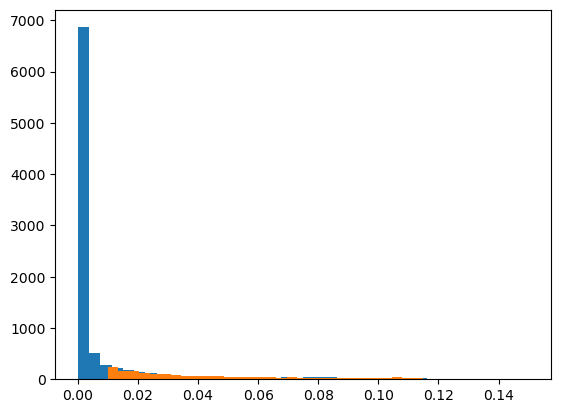

In [311]:
print(df_small['PEP'].min())
print(df_small['PEP'].max())
plt.hist(df_small['PEP'], bins = 40, range= (0,0.15))


(array([238., 171., 167., 116., 110.,  94.,  78.,  63.,  58.,  60.,  61.,
         47.,  35.,  37.,  35.,  38.,  23.,  40.,  33.,  34.,  34.,  32.,
         30.,  24.,  30.,  18.,  27.,  37.,  17.,  17.,  14.,  11.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.01  , 0.0135, 0.017 , 0.0205, 0.024 , 0.0275, 0.031 , 0.0345,
        0.038 , 0.0415, 0.045 , 0.0485, 0.052 , 0.0555, 0.059 , 0.0625,
        0.066 , 0.0695, 0.073 , 0.0765, 0.08  , 0.0835, 0.087 , 0.0905,
        0.094 , 0.0975, 0.101 , 0.1045, 0.108 , 0.1115, 0.115 , 0.1185,
        0.122 , 0.1255, 0.129 , 0.1325, 0.136 , 0.1395, 0.143 , 0.1465,
        0.15  ]),
 <BarContainer object of 40 artists>)

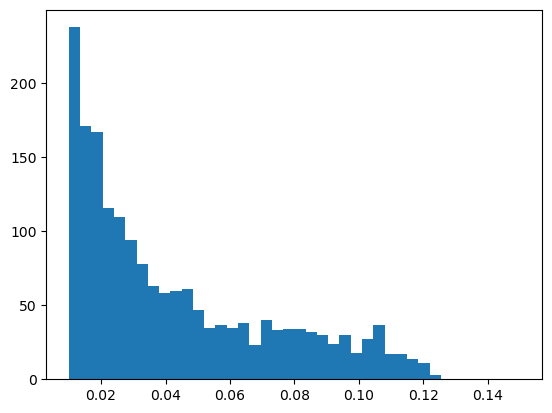

In [312]:
plt.hist(df_small['PEP'], bins = 40, range= (0.01,0.15))

#### Score

0.1807
451.43


(array([1.910e+02, 4.390e+02, 6.800e+02, 9.540e+02, 1.007e+03, 9.050e+02,
        8.510e+02, 6.340e+02, 5.650e+02, 4.970e+02, 4.060e+02, 3.850e+02,
        3.020e+02, 2.670e+02, 2.260e+02, 1.780e+02, 1.670e+02, 1.250e+02,
        1.190e+02, 9.100e+01, 7.700e+01, 6.700e+01, 4.600e+01, 6.200e+01,
        4.000e+01, 2.400e+01, 3.000e+01, 1.500e+01, 1.300e+01, 8.000e+00,
        8.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.80700000e-01, 1.14619325e+01, 2.27431650e+01, 3.40243975e+01,
        4.53056300e+01, 5.65868625e+01, 6.78680950e+01, 7.91493275e+01,
        9.04305600e+01, 1.01711793e+02, 1.12993025e+02, 1.24274258e+02,
        1.35555490e+02, 1.46836723e+02, 1.58117955e+02, 1.69399188e+02,
        1.80680420e+02, 1.91961652e+02, 2.03242885e+02, 2.14524117e+02,
        2.25805350e+02, 2.37086582e+02, 2.48367815e+02, 2.59649047e+02,
        2.70930280e+02, 2.82211512e+02, 2.93492745e+02, 3.04773978e+02

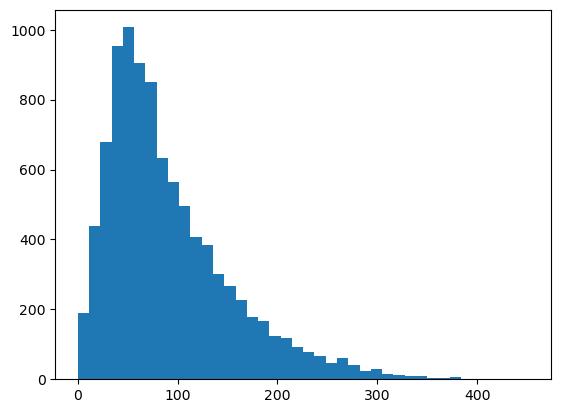

In [314]:
print(df_small['Score'].min())
print(df_small['Score'].max())
plt.hist(df_small['Score'], bins = 40,)


### Delta Score

0.0
413.33


(array([2.080e+02, 4.830e+02, 7.860e+02, 9.380e+02, 1.038e+03, 9.750e+02,
        7.990e+02, 6.560e+02, 5.220e+02, 4.690e+02, 4.220e+02, 3.300e+02,
        2.870e+02, 2.470e+02, 2.000e+02, 1.610e+02, 1.570e+02, 1.330e+02,
        9.900e+01, 9.400e+01, 6.800e+01, 5.600e+01, 5.500e+01, 4.600e+01,
        3.500e+01, 2.900e+01, 2.800e+01, 1.500e+01, 1.500e+01, 1.700e+01,
        7.000e+00, 7.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.     ,  10.33325,  20.6665 ,  30.99975,  41.333  ,  51.66625,
         61.9995 ,  72.33275,  82.666  ,  92.99925, 103.3325 , 113.66575,
        123.999  , 134.33225, 144.6655 , 154.99875, 165.332  , 175.66525,
        185.9985 , 196.33175, 206.665  , 216.99825, 227.3315 , 237.66475,
        247.998  , 258.33125, 268.6645 , 278.99775, 289.331  , 299.66425,
        309.9975 , 320.33075, 330.664  , 340.99725, 351.3305 , 361.66375,
        371.997  , 382.33025, 392.6635 , 402.99675, 413.33

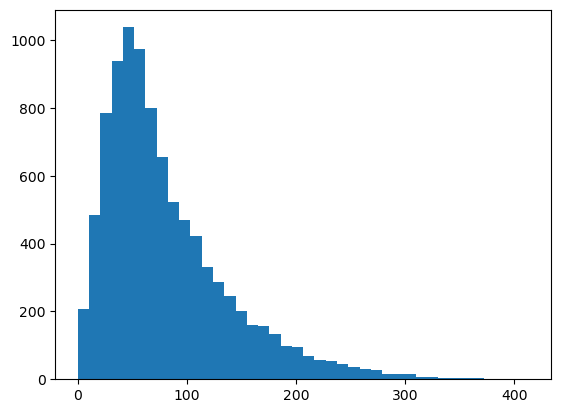

In [315]:
print(df_small['Delta score'].min())
print(df_small['Delta score'].max())
plt.hist(df_small['Delta score'], bins = 40)


# Thoughts

How many sequence in there with different charge state?

# Plots (in general)


<Axes: xlabel='Mass', ylabel='CCS'>

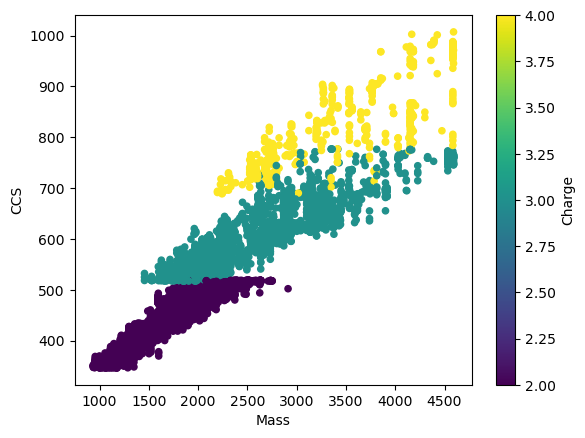

In [293]:
# sequence length vs CCS
df_small.plot.scatter(x='Mass', y= 'CCS', c= 'Charge', colormap = 'viridis')

<Axes: xlabel='CCS', ylabel='1/K0'>

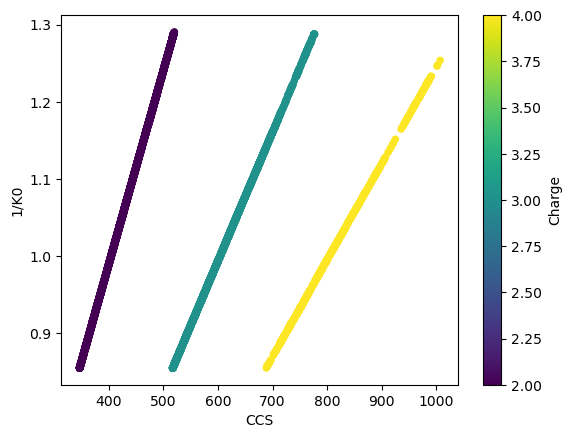

In [ ]:
# mass vs 1/K0
df_small.plot.scatter(x='CCS', y= '1/K0', c='Charge', colormap='viridis')

<Axes: xlabel='m/z', ylabel='1/K0'>

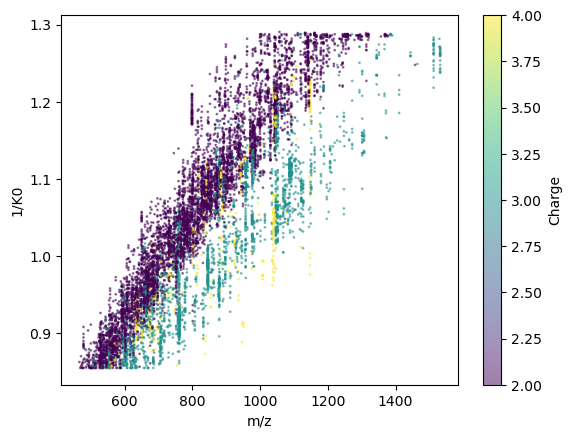

In [300]:
df_small.plot.scatter(x='m/z', y= '1/K0', c='Charge', colormap='viridis', alpha = 0.5, s = 1)
